# Development and Validation of an Adaptive Machine Learning Pipeline for Cardiovascular Disease Risk Prediction

### Backgroung:
The primary cause of morbidity and mortality worldwide is cardiovascular disease (CVD). Brunei Darussalam is no exception; CVDs were the leading cause of death in 2015. Therefore, CVDs have substantial effects on public health and will eventually impair Brunei's economically productive workforce. In Brunei, the sole recommended technique for assessing CVD risk is the WHO/ISH risk prediction chart, which has not been validated in the local population. During the COVID-19 pandemic, MOH Brunei Darussalam developed the BruHealth mobile application on a digital platform with several essential features that have a significant impact on the general public's health. 

### Methods: 
A Supervised Classification Machine Learning Problem using standard libraries and modules in the Python3 environment and the TensorFlow backend since **an Adaptive AI predictive modelling pipeline of machine learning algorithms** will be developed and validated using open source CVD risk data collated form the literature and then will be tested by local Bruneian CVD risk data and then will be continously updated and adapted with the prospectively populated CVD risk data through BruHealth national mobile application.

### Objectives
1. To develop an Adaptive pipeline of different ML and DL algorithms for predicting the risk of the future CVD events and tested by Brunei-specific CVD risk data.
2. To estimate the accuracy, sensitivity (recall), specificity, positive predictive value (precision), area under the ROC curve (AUC ROC), the area under the precision-recall curve (AUC PR) and F1 score of the developed ML/DL algorithms pipeline.
3. To compare and prioritize the performance of the different ML/DL classifiers used in developing this automated CVD risk calculator using calculated metrics using an internal validation by splitting the data into training and validation dataset and an external testing by local Bruneian CVD risk data.

## Part 2: Data collection & Preprocessing for Lab-based dataset

## Importing Libraries

In [76]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
import random
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Lab-based datasets

#### Description 


#### list
1. Framingham dataset
2. Canadian dataset
3. Bangladesh dataset
4. India Osteoarthritis center
5. South India fibromyalgia center
6. Italy dataset
7. US NHANES dataset

### 1. Framingham dataset 

In [77]:
# Reading and converting the data into a pandas dataframe
Framingham_df = pd.read_csv(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Lab based Datasets/Framingham dataset/framingham.csv")

# Informtion about the raw dataset
Framingham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


#### Background
- The Framingham Study began in 1948 under the U.S. Public Health Service and was transferred under the direct operations of the new National Heart Institute, NIH, in 1949. Participants were sampled from Framingham, Massachusetts, including both men and women. This was the first prospective study of cardiovascular disease and identified the concept of risk factors and their joint effects. The study has continued to examine participants every two years and is currently supported by a contract to Boston University from the NHLBI, and from many grants for specialized studies.
- This dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

##### Citaion:
1. `Kuruvilla, A. M., & Balaji, N. V. (2021). Heart disease prediction system using Correlation Based Feature Selection with Multilayer Perceptron approach. IOP Conference Series: Materials Science and Engineering, 1085(1), 012028. doi:10.1088/1757-899X/1085/1/012028`
2. `K. Psychogyios, L. Ilias, & D. Askounis. (2022). Comparison of Missing Data Imputation Methods using the Framingham Heart study dataset. doi:10.1109/BHI56158.2022.9926882`


In [78]:
# Checking Missing values in the dataset

num_Missing_values_Framingham = Framingham_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_Framingham, '\n')

# Checking dupicated values in the dataset
duplicates_Framingham = Framingham_df.duplicated().sum()
if duplicates_Framingham:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_Framingham))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  645 

Dataset contains no Duplicate Values


####  Data Preprocessing and Cleaning 
For our Machine learning pipeline, the office-based CVD risk screening variables will be defined with the following uniforms description and types: 
 
| Column | Description |
| ------ | ----------- |
| Age | **(float) in years** |
| Gender |**(categorical code) 1: Female, 2: Male**|
| SysBP |**(float) Systolic blood pressure** |
| Diabetes |**(categorical code) 1: Diabetic, 0: Non-Diabetic** |
| Smoking |**(categorical code) 1: Smoker, 0: Non-Smoker** |
| Tot_Chol_mmol/l | **(float) Total cholesterol by mmol/l** | 
| CVD risk |**Target label (binary) 1: Presence of CVD,  0: absence of CVD**|

In [79]:
# define variable columns based on lab-based CVD screening strategy
Framingham_df = Framingham_df.loc[:,['age','male','sysBP','diabetes','currentSmoker','totChol','TenYearCHD']]
Framingham_df.head()

,age,male,sysBP,diabetes,currentSmoker,totChol,TenYearCHD
0,39,1,106.0,0,0,195.0,0
1,46,0,121.0,0,0,250.0,0
2,48,1,127.5,0,1,245.0,0
3,61,0,150.0,0,1,225.0,1
4,46,0,130.0,0,1,285.0,0


In [80]:
# Uniforming the columns names
Framingham_df.rename({'age': 'Age', 
                      'male': 'Gender',
                      'sysBP': 'SysBP',
                      'diabetes' : 'Diabetes',
                      'currentSmoker' : 'Smoking',
                      'totChol' : 'Tot_Chol_mmol/l',
                      'TenYearCHD' : 'CVD risk'}, axis = 1, inplace = True)
Framingham_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,39,1,106.0,0,0,195.0,0
1,46,0,121.0,0,0,250.0,0
2,48,1,127.5,0,1,245.0,0
3,61,0,150.0,0,1,225.0,1
4,46,0,130.0,0,1,285.0,0


In [81]:
Framingham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4240 non-null   int64  
 1   Gender           4240 non-null   int64  
 2   SysBP            4240 non-null   float64
 3   Diabetes         4240 non-null   int64  
 4   Smoking          4240 non-null   int64  
 5   Tot_Chol_mmol/l  4190 non-null   float64
 6   CVD risk         4240 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 232.0 KB


In [82]:
# Defining the correct type of the Age variable
Framingham_df['Age'] = Framingham_df['Age'].astype("float")

# Correcting categories of Gender variables
Framingham_df['Gender'].replace({0 : 1, 1 : 2}, inplace = True)

# Converting value of the total cholesterol to mmol/l
Framingham_df['Tot_Chol_mmol/l']=Framingham_df['Tot_Chol_mmol/l'].apply(lambda x:round(x*0.02586,1)) 
#To get from mg/dL to SI (in mmol/L) multiply by 0.02586.

Framingham_df.head(10)

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,39.0,2,106.0,0,0,5.0,0
1,46.0,1,121.0,0,0,6.5,0
2,48.0,2,127.5,0,1,6.3,0
3,61.0,1,150.0,0,1,5.8,1
4,46.0,1,130.0,0,1,7.4,0
5,43.0,1,180.0,0,0,5.9,0
6,63.0,1,138.0,0,0,5.3,1
7,45.0,1,100.0,0,1,8.1,0
8,52.0,2,141.5,0,0,6.7,0
9,43.0,2,162.0,0,1,5.8,0


In [83]:
Framingham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4240 non-null   float64
 1   Gender           4240 non-null   int64  
 2   SysBP            4240 non-null   float64
 3   Diabetes         4240 non-null   int64  
 4   Smoking          4240 non-null   int64  
 5   Tot_Chol_mmol/l  4190 non-null   float64
 6   CVD risk         4240 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 232.0 KB


In [84]:
# Checking varible coulmns with Missing values in the dataset
Framingham_df.isna().sum()

Age                 0
Gender              0
SysBP               0
Diabetes            0
Smoking             0
Tot_Chol_mmol/l    50
CVD risk            0
dtype: int64

In [85]:
# Checking the brief statistical properities of the numerical variables in the dataset
numeric_features = ['Age', 'SysBP', 'Tot_Chol_mmol/l' ]
Framingham_df[numeric_features].describe()

,Age,SysBP,Tot_Chol_mmol/l
count,4240.000000,4240.000000,4190.000000
mean,49.580189,132.354599,6.121432
std,8.572942,22.033300,1.154091
min,32.000000,83.500000,2.800000
25%,42.000000,117.000000,5.300000
50%,49.000000,128.000000,6.100000
75%,56.000000,144.000000,6.800000
max,70.000000,295.000000,18.000000


In [86]:
# Filling the missing values of the total cholesterol with the median the variable column
Framingham_df['Tot_Chol_mmol/l'].fillna(Framingham_df['Tot_Chol_mmol/l'].median(), inplace=True) # meadian is near to the mean

Framingham_df.isna().sum()

Age                0
Gender             0
SysBP              0
Diabetes           0
Smoking            0
Tot_Chol_mmol/l    0
CVD risk           0
dtype: int64

In [87]:
Framingham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4240 non-null   float64
 1   Gender           4240 non-null   int64  
 2   SysBP            4240 non-null   float64
 3   Diabetes         4240 non-null   int64  
 4   Smoking          4240 non-null   int64  
 5   Tot_Chol_mmol/l  4240 non-null   float64
 6   CVD risk         4240 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 232.0 KB


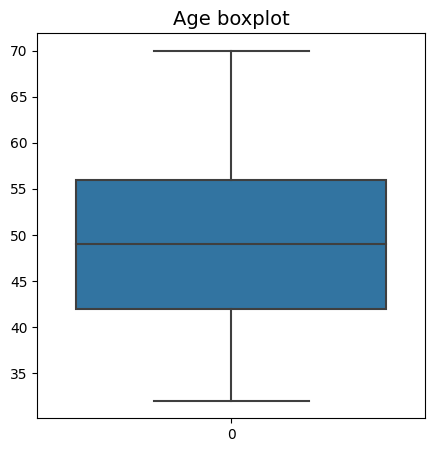

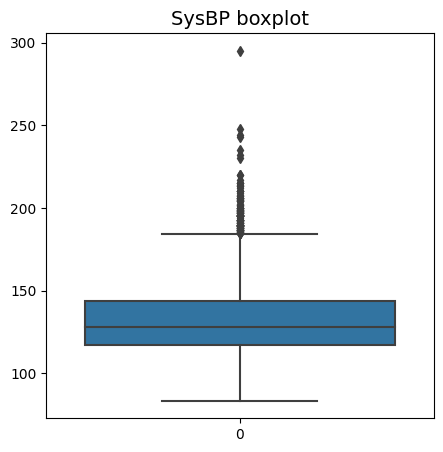

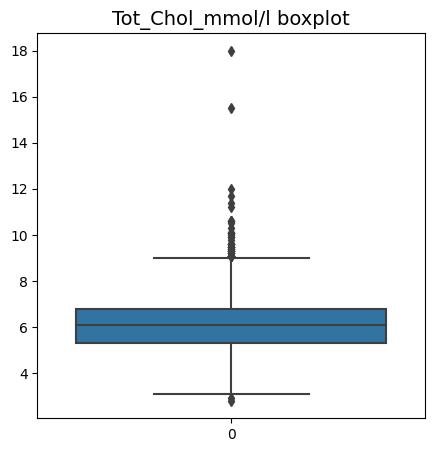

In [88]:
# Plotting the numerical variables in  the dataset
for feature in numeric_features:
    plt.figure(figsize=(5,5), facecolor='w')
    sns.boxplot(data=Framingham_df[feature])
    plt.title(f'{feature} boxplot', fontsize=14)
    plt.show()

In [89]:
# outliers detection

outliers_SysBP = (Framingham_df[(Framingham_df["SysBP"]>=280) | (Framingham_df["SysBP"] < 60)])
print(f'The total number of outliers in SysBP is: {len(outliers_SysBP)} ')

outliers_Tot_Chol = (Framingham_df[(Framingham_df["Tot_Chol_mmol/l"]>=14)])
print(f'The total number of outliers in Tot_Chol is: {len(outliers_Tot_Chol)} ')


The total number of outliers in SysBP is: 1 
The total number of outliers in Tot_Chol is: 2 


In [90]:
# outliers removal

Framingham_df = Framingham_df[ (Framingham_df['SysBP'] < 280) & (Framingham_df['SysBP'] >= 60)]
Framingham_df = Framingham_df[(Framingham_df["Tot_Chol_mmol/l"] <14)]

Framingham_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 0 to 4239
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4237 non-null   float64
 1   Gender           4237 non-null   int64  
 2   SysBP            4237 non-null   float64
 3   Diabetes         4237 non-null   int64  
 4   Smoking          4237 non-null   int64  
 5   Tot_Chol_mmol/l  4237 non-null   float64
 6   CVD risk         4237 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 264.8 KB


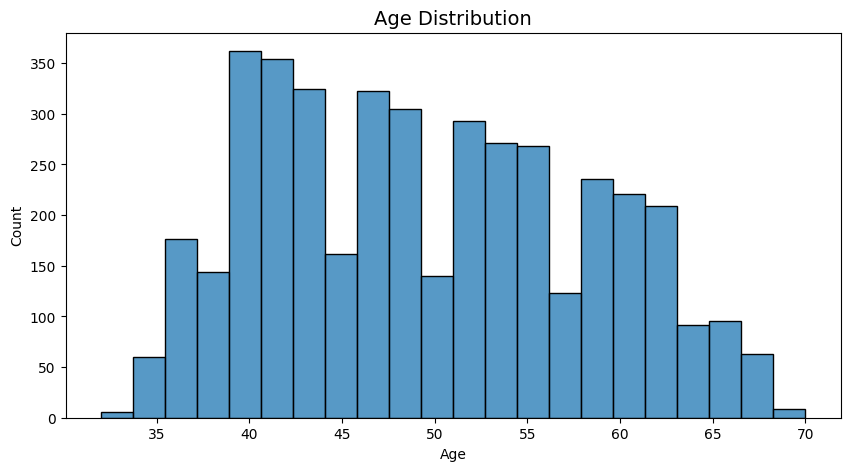

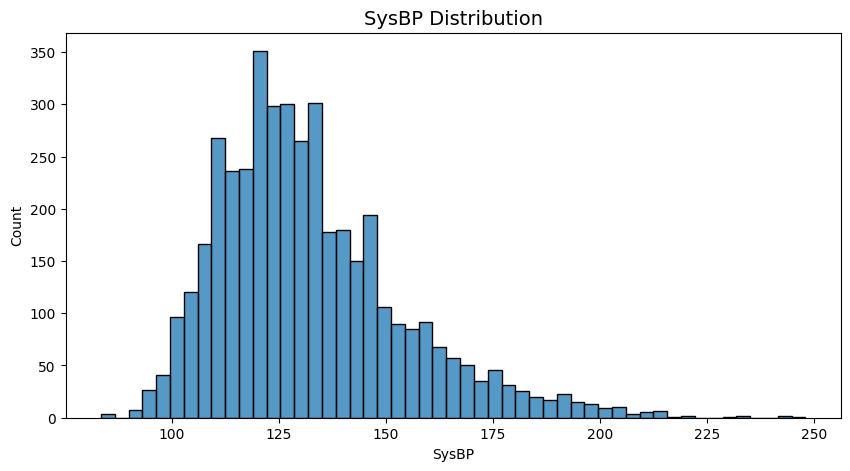

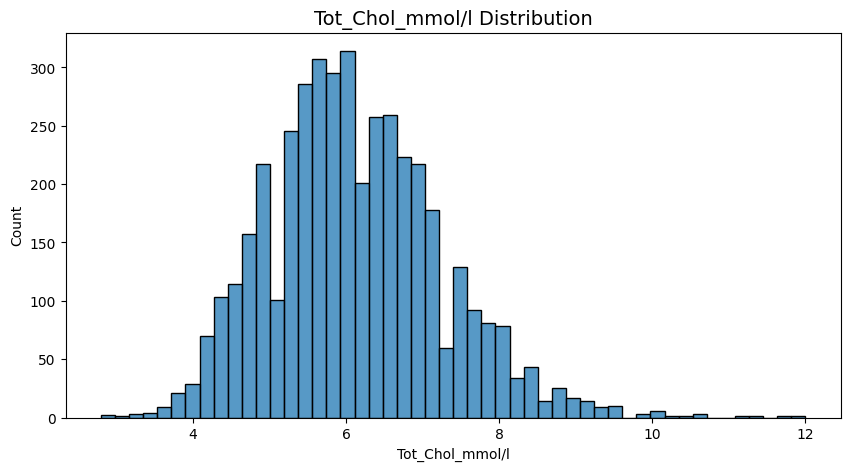

In [91]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(Framingham_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- Age distribution is uneven distribution.
- However, Systolic blood pressure "SysBP" distribution and total cholesterol distribution are almost normal.

In [92]:
# Checking the brief statistical properities of the categorical variables in the dataset

categorical_features = ['Gender', 'Diabetes', 'Smoking', 'CVD risk']
for feature in categorical_features:
    print(feature,':')
    print(Framingham_df[feature].value_counts())
    print("-----------------")

Gender :
1    2418
2    1819
Name: Gender, dtype: int64
-----------------
Diabetes :
0    4129
1     108
Name: Diabetes, dtype: int64
-----------------
Smoking :
0    2143
1    2094
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    3595
1     642
Name: CVD risk, dtype: int64
-----------------


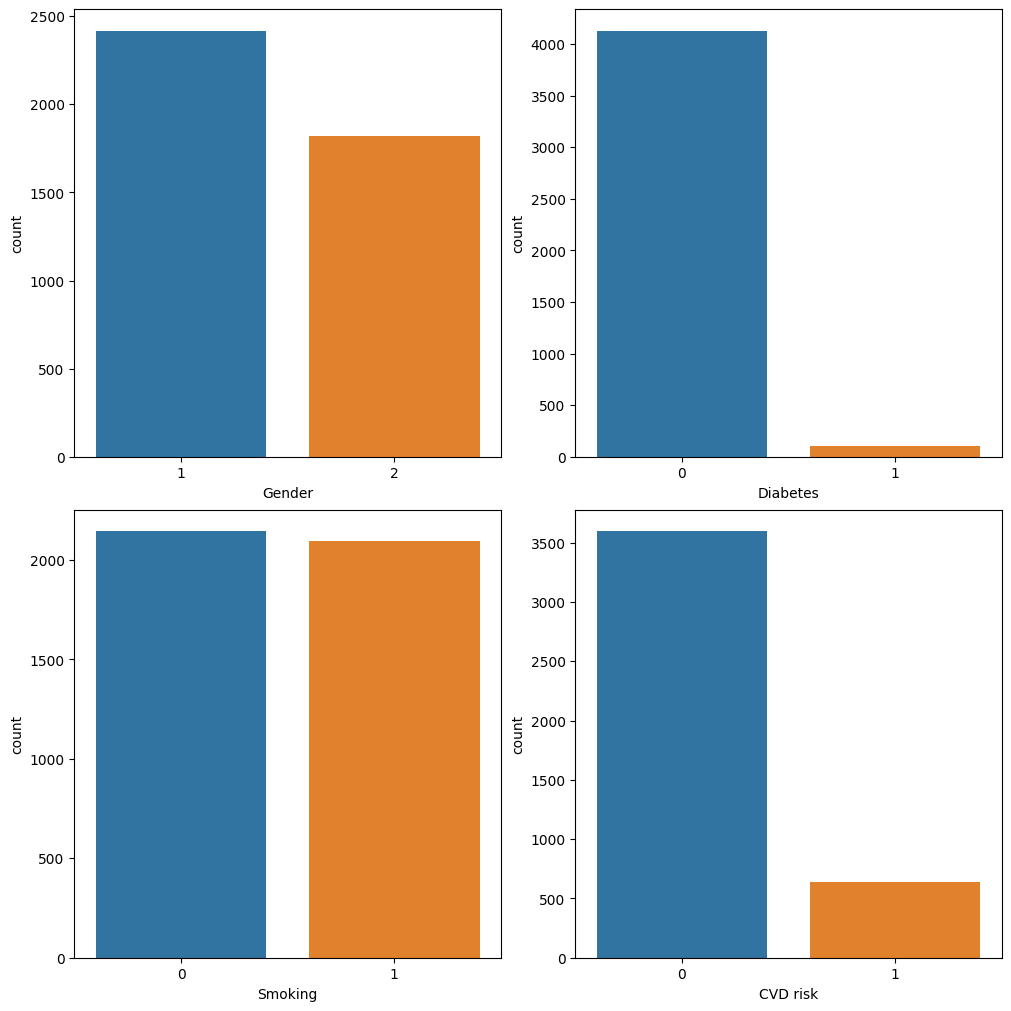

In [93]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(5*total_cols, 5*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=Framingham_df, ax=axs[row][pos])

Among the categorical features:
* `Diabetes` is highly imbalanced.
* The target labl `CVD risk` is also showing some class imbalance.

### 2. Canadian dataset

In [94]:
# Reading and converting the data into a pandas dataframe
Canadian_df = pd.read_csv(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Lab based Datasets/Canadian dataset/CHMRAT_internal_validation.csv")

# Informtion about the raw dataset
Canadian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Counter                         390 non-null    int64 
 1   Diagnosis                       390 non-null    object
 2   Sex                             390 non-null    object
 3   Age                             390 non-null    object
 4   Ethnicity                       390 non-null    object
 5   Body_Mass_Index                 390 non-null    object
 6   Waist_Circumference             390 non-null    object
 7   Cholesterol                     390 non-null    object
 8   Systolic_Blood_Pressure         390 non-null    object
 9   Fasting_Blood_Glucose           390 non-null    object
 10  Family_History_Diabetes         390 non-null    object
 11  Family_History_Cardiovascular   390 non-null    object
 12  Family_History_Prostate_Cancer  390 non-null    ob

#### Background
- Data used for internal validation of the Canadian Men’s Risk Assessment Tool

##### Citaion:
> `Pourmalek, F. (2013). Data used for internal validation of the Canadian Men’s Risk Assessment Tool (V1 ed.) [Data set]. doi:10.7910/DVN/F3N0VL`


In [95]:
# Checking Missing values in the dataset

num_Missing_values_Canadian = Canadian_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_Canadian, '\n')

# Checking dupicated values in the dataset
duplicates_Canadian = Canadian_df.duplicated().sum()
if duplicates_Canadian:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_Canadian))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  0 

Dataset contains no Duplicate Values


####  Data Preprocessing and Cleaning 
For our Machine learning pipeline, the office-based CVD risk screening variables will be defined with the following uniforms description and types: 
 
| Column | Description |
| ------ | ----------- |
| Age | **(float) in years** |
| Gender |**(categorical code) 1: Female, 2: Male**|
| SysBP |**(float) Systolic blood pressure** |
| Diabetes |**(categorical code) 1: Diabetic, 0: Non-Diabetic** |
| Smoking |**(categorical code) 1: Smoker, 0: Non-Smoker** |
| Tot_Chol_mmol/l | **(float) Total cholesterol by mmol/l** | 
| CVD risk |**Target label (binary) 1: Presence of CVD,  0: absence of CVD**|

In [96]:
# define variable columns based on lab-based CVD screening strategy
Canadian_df = Canadian_df.loc[:,['Age','Sex','Systolic_Blood_Pressure','Diabetes','Smoker_current','Cholesterol','Cardiovascular']]
Canadian_df.head(10)

,Age,Sex,Systolic_Blood_Pressure,Diabetes,Smoker_current,Cholesterol,Cardiovascular
0,>= 65,Male,High (>= 140),No,No,Normal (< 5.2),No
1,45-64,Male,High (>= 140),No,No,High (> 6.2),No
2,45-64,Male,Bordline High (120-139),Yes,Yes,Normal (< 5.2),No
3,45-64,Male,Bordline High (120-139),Yes,Yes,Normal (< 5.2),No
4,45-64,Male,High (>= 140),No,No,Bordline High (5.2-6.2),No
5,>= 65,Male,High (>= 140),Yes,No,Normal (< 5.2),No
6,45-64,Male,High (>= 140),Yes,No,Normal (< 5.2),No
7,45-64,Male,High (>= 140),No,Yes,High (> 6.2),No
8,45-64,Male,High (>= 140),No,Yes,Normal (< 5.2),No
9,45-64,Male,Bordline High (120-139),No,Yes,High (> 6.2),No


In [97]:
# Uniforming the columns names
Canadian_df.rename({'Age': 'Age', 
                      'Sex': 'Gender',
                      'Systolic_Blood_Pressure': 'SysBP',
                      'Diabetes' : 'Diabetes',
                      'Smoker_current' : 'Smoking',
                      'Cholesterol' : 'Tot_Chol_mmol/l',
                      'Cardiovascular' : 'CVD risk'}, axis = 1, inplace = True)
Canadian_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,>= 65,Male,High (>= 140),No,No,Normal (< 5.2),No
1,45-64,Male,High (>= 140),No,No,High (> 6.2),No
2,45-64,Male,Bordline High (120-139),Yes,Yes,Normal (< 5.2),No
3,45-64,Male,Bordline High (120-139),Yes,Yes,Normal (< 5.2),No
4,45-64,Male,High (>= 140),No,No,Bordline High (5.2-6.2),No


In [98]:
# Studying the types of each variable coulumn
Canadian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              390 non-null    object
 1   Gender           390 non-null    object
 2   SysBP            390 non-null    object
 3   Diabetes         390 non-null    object
 4   Smoking          390 non-null    object
 5   Tot_Chol_mmol/l  390 non-null    object
 6   CVD risk         390 non-null    object
dtypes: object(7)
memory usage: 21.5+ KB


In [99]:
# Studying the categories of each variable coulumn
print(f'Categories of Age column: {Canadian_df["Age"].unique()} ')
print(f'Categories of Gender column: {Canadian_df["Gender"].unique()} ')
print(f'Categories of SysBP column: {Canadian_df["SysBP"].unique()} ')
print(f'Categories of Diabetes column: {Canadian_df["Diabetes"].unique()} ')
print(f'Categories of Smoking column: {Canadian_df["Smoking"].unique()} ')
print(f'Categories of Tot_Chol_mmol/l column: {Canadian_df["Tot_Chol_mmol/l"].unique()} ')
print(f'Categories of CVD risk column: {Canadian_df["CVD risk"].unique()} ')

Categories of Age column: ['>= 65' '45-64' '< 45'] 
Categories of Gender column: ['Male'] 
Categories of SysBP column: ['High (>= 140)' 'Bordline High (120-139)' 'Normal (< 120)'] 
Categories of Diabetes column: ['No' 'Yes'] 
Categories of Smoking column: ['No' 'Yes' 'Unknown'] 
Categories of Tot_Chol_mmol/l column: ['Normal (< 5.2)' 'High (> 6.2)' 'Bordline High (5.2-6.2)'] 
Categories of CVD risk column: ['No' 'Yes'] 


In [100]:
# Converting categories of Age variables to random numeric values within the specified range
Canadian_df['Age']= Canadian_df['Age'].apply(lambda x:
                                             round(random.uniform(65, 85), 1) if '>= 65' 
                                             else round(random.uniform(45, 64), 1) if '45-64' 
                                             else round(random.uniform(25, 45), 1) if '< 45' 
                                             else None ) 

# Correcting categories of Gender variables
Canadian_df['Gender'].replace({'Male' : 2}, inplace = True)


# Converting categories of SysBP variables to random numeric values within the specified range
Canadian_df['SysBP']= Canadian_df['SysBP'].apply(lambda x:
                                             round(random.uniform(140, 160), 1) if 'High (>= 140)' 
                                             else round(random.uniform(120, 139), 1) if 'Bordline High (120-139)'
                                             else round(random.uniform(100, 119), 1) if 'Normal (< 120)'
                                             else None ) 

# Correcting categories of Diabetes variables
Canadian_df['Diabetes'].replace({'No' : 0,'Yes': 1}, inplace = True)

# Correcting categories of Smoking variables
Canadian_df['Smoking'].replace({'Unknown': 0, 'No' : 0,'Yes': 1}, inplace = True)

# Converting categories of total chlesterol variables to random numeric values within the specified range
Canadian_df['Tot_Chol_mmol/l']= Canadian_df['Tot_Chol_mmol/l'].apply(lambda x:
                                                                     round(random.uniform(4.2, 5.2), 1) if 'Normal (< 5.2)' 
                                                                     else round(random.uniform(6.2, 7.2), 1) if 'High (> 6.2)' 
                                                                     else round(random.uniform(5.2, 6.2), 1) if 'Bordline High (5.2-6.2)' 
                                                                     else None ) 

# Correcting categories of CVD risk variables
Canadian_df['CVD risk'].replace({'No' : 0,'Yes': 1}, inplace = True)



Canadian_df.head(10)

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,68.6,2,153.2,0,0,5.1,0
1,77.2,2,156.5,0,0,4.7,0
2,72.5,2,150.8,1,1,4.3,0
3,83.2,2,143.8,1,1,4.9,0
4,83.5,2,153.6,0,0,5.0,0
5,69.0,2,141.5,1,0,4.7,0
6,67.6,2,145.6,1,0,4.5,0
7,72.2,2,151.4,0,1,4.4,0
8,82.2,2,150.7,0,1,4.4,0
9,84.9,2,149.8,0,1,4.7,0


In [101]:
Canadian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              390 non-null    float64
 1   Gender           390 non-null    int64  
 2   SysBP            390 non-null    float64
 3   Diabetes         390 non-null    int64  
 4   Smoking          390 non-null    int64  
 5   Tot_Chol_mmol/l  390 non-null    float64
 6   CVD risk         390 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.5 KB


In [102]:
# Checking the brief statistical properities of the numerical variables in the dataset

Canadian_df[numeric_features].describe()

,Age,SysBP,Tot_Chol_mmol/l
count,390.000000,390.000000,390.000000
mean,75.279744,149.865385,4.707436
std,5.915704,5.872480,0.295330
min,65.000000,140.000000,4.200000
25%,70.300000,144.825000,4.500000
50%,75.150000,150.000000,4.700000
75%,80.800000,155.175000,5.000000
max,85.000000,159.900000,5.200000


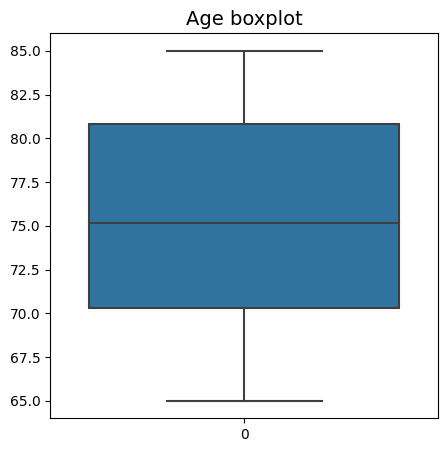

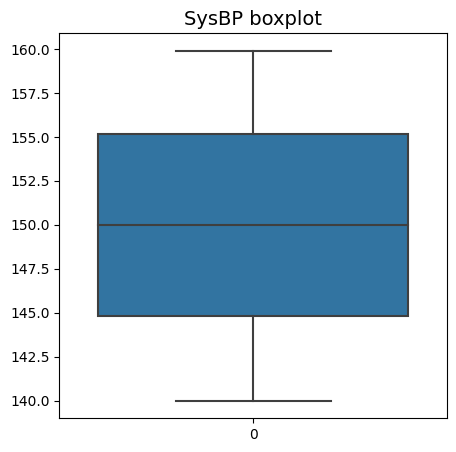

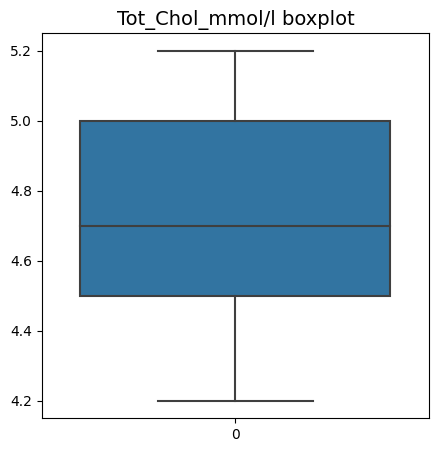

In [103]:
# Plotting the numerical variables in  the dataset
for feature in numeric_features:
    plt.figure(figsize=(5,5), facecolor='w')
    sns.boxplot(data=Canadian_df[feature])
    plt.title(f'{feature} boxplot', fontsize=14)
    plt.show()

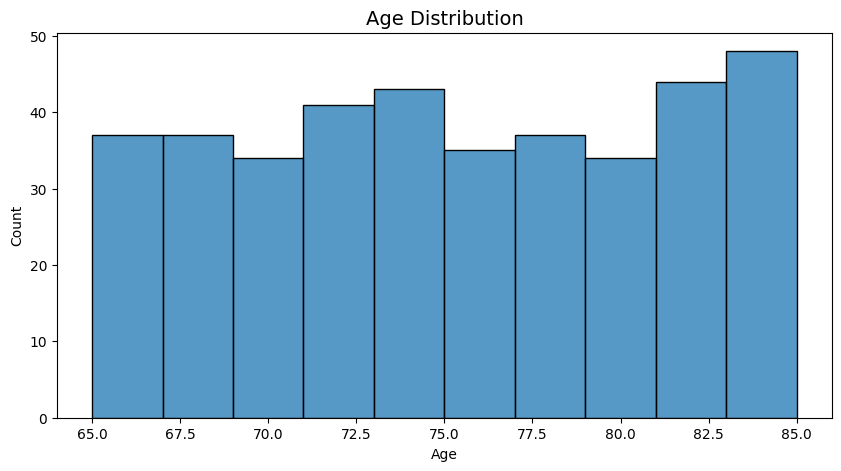

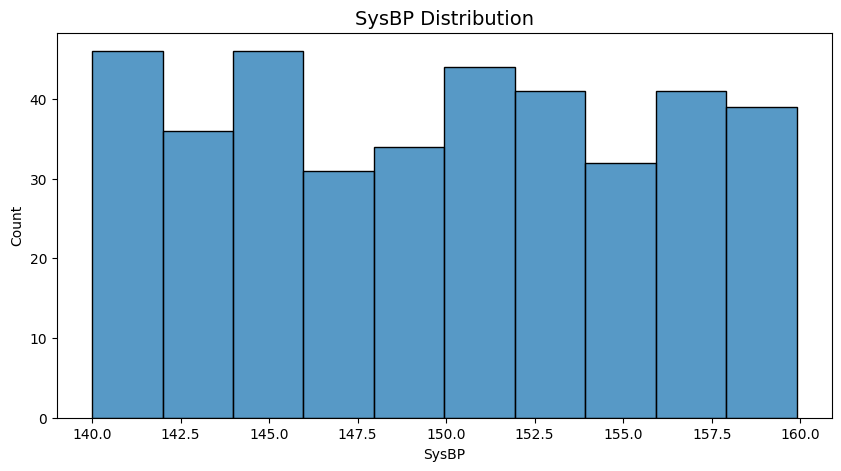

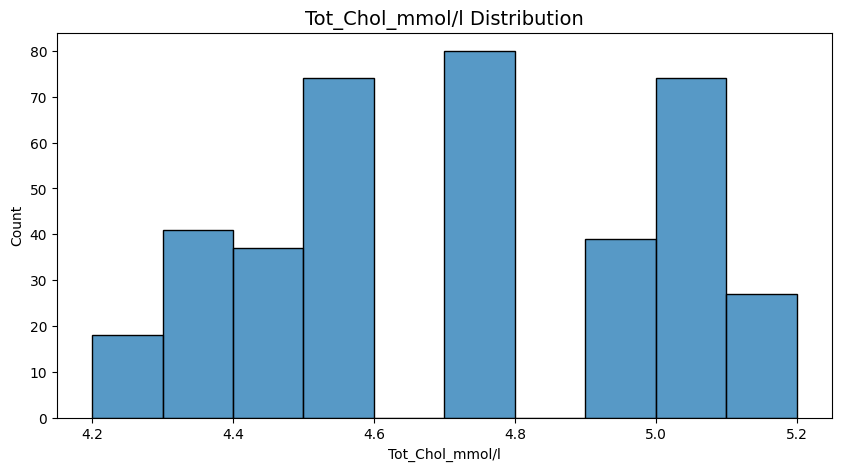

In [104]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(Canadian_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- Age and Systolic blood pressure "SysBP" distribution seem to be uniform distribution, that can be due uniform random imuputation technique of the categories or small sample size.

In [105]:
# Checking the brief statistical properities of the categorical variables in the dataset

for feature in categorical_features:
    print(feature,':')
    print(Canadian_df[feature].value_counts())
    print("-----------------")

Gender :
2    390
Name: Gender, dtype: int64
-----------------
Diabetes :
0    340
1     50
Name: Diabetes, dtype: int64
-----------------
Smoking :
0    266
1    124
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    378
1     12
Name: CVD risk, dtype: int64
-----------------


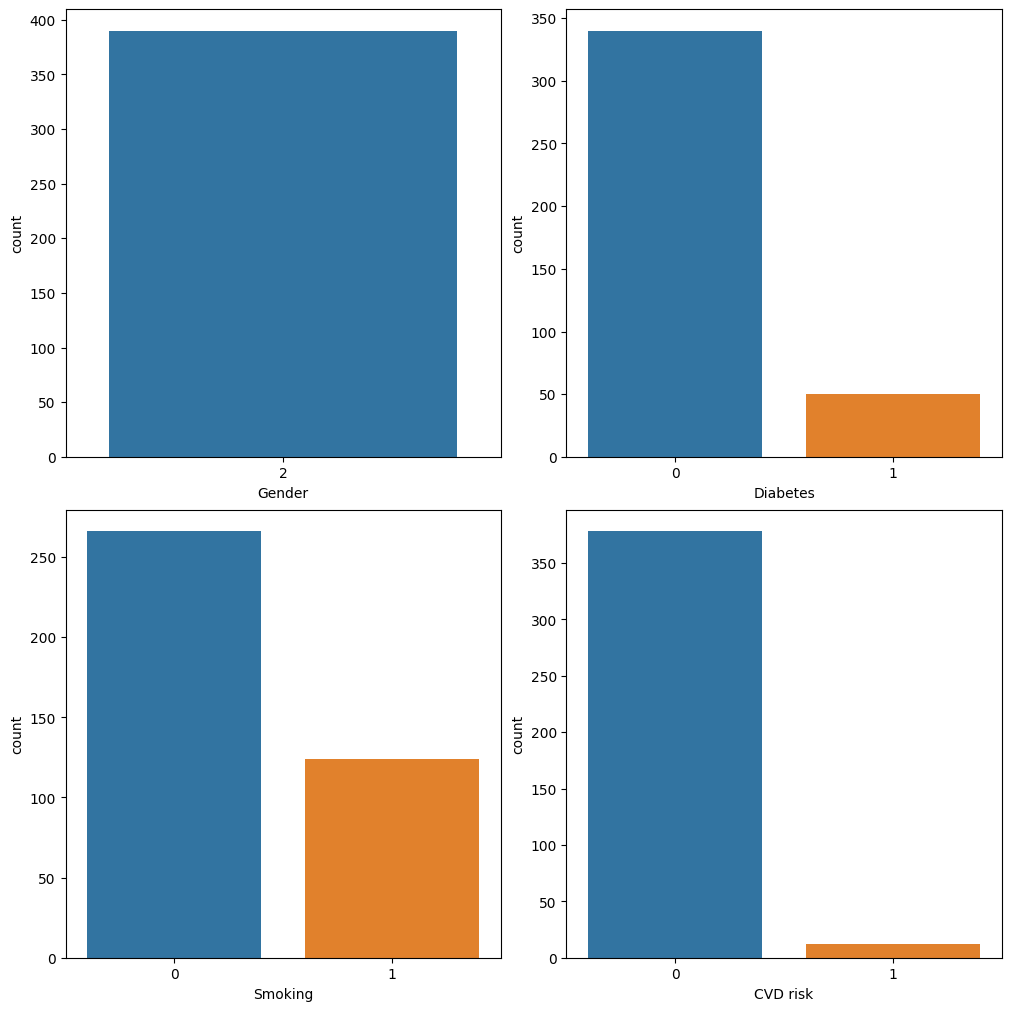

In [106]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(5*total_cols, 5*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=Canadian_df, ax=axs[row][pos])

Among the categorical features:
* The `Gender` of this dataset is known to be all male. 
* `Diabetes` are  imbalanced.
* The target labl `CVD risk` is also showing high class imbalance

### 3. Bangladesh dataset 

In [107]:
# Reading and converting the data into a pandas dataframe
Bangladesh_df = pd.read_excel(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Lab based Datasets/Bangladesh/original excel_PA.xlsx")

# Informtion about the raw dataset
Bangladesh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         265 non-null    int64  
 1   age                                        265 non-null    int64  
 2   religion                                   265 non-null    object 
 3   marital status                             265 non-null    object 
 4   Risk level                                 265 non-null    object 
 5   educational status                         265 non-null    object 
 6   occupation                                 265 non-null    object 
 7   monthly income BDT                         265 non-null    int64  
 8   history of DM                              265 non-null    object 
 9   family H/O NCD                             265 non-null    object 
 10  age of menarche_years     

#### Background
- Data for: Physical activity levels and associated cardiovascular disease risk factors among postmenopausal rural women of Bangladesh

##### Citaion:
> `Barua, Lingkan; Faruque, Mithila; Banik, Palash; Ali, Liaquat (2018), “Data for: Physical activity levels and associated cardiovascular disease risk factors among postmenopausal rural women of Bangladesh”, Mendeley Data, V1, doi: 10.17632/j6m2f6nvc9.1`

In [108]:
# Checking Missing values in the dataset

num_Missing_values_Bangladesh = Bangladesh_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_Bangladesh, '\n')

# Checking dupicated values in the dataset
duplicates_Bangladesh = Bangladesh_df.duplicated().sum()
if duplicates_Bangladesh:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_Bangladesh))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  282 

Dataset contains no Duplicate Values


####  Data Preprocessing and Cleaning 
For our Machine learning pipeline, the office-based CVD risk screening variables will be defined with the following uniforms description and types: 
 
| Column | Description |
| ------ | ----------- |
| Age | **(float) in years** |
| Gender |**(categorical code) 1: Female, 2: Male**|
| SysBP |**(float) Systolic blood pressure** |
| Diabetes |**(categorical code) 1: Diabetic, 0: Non-Diabetic** |
| Smoking |**(categorical code) 1: Smoker, 0: Non-Smoker** |
| Tot_Chol_mmol/l | **(float) Total cholesterol by mmol/l** | 
| CVD risk |**Target label (binary) 1: Presence of CVD,  0: absence of CVD**|

In [109]:
# define variable columns based on lab-based CVD screening strategy
Bangladesh_df = Bangladesh_df.loc[:,['age','q44_sbp_mm/Hg','history of DM','currently use  smokeless tobacco products','tch_mmol/l','Risk level']]
Bangladesh_df.head(10)

,age,q44_sbp_mm/Hg,history of DM,currently use smokeless tobacco products,tch_mmol/l,Risk level
0,51,120,no,no,3.74970,low
1,50,100,no,no,4.49964,low
2,67,140,no,no,3.95658,moderate
3,61,130,yes,no,3.74970,moderate
4,50,140,yes,yes,3.82728,moderate
5,53,110,no,yes,4.80996,low
6,52,90,no,no,3.43938,low
7,45,100,yes,no,4.34448,low
8,60,130,no,no,3.93072,low
9,45,100,no,no,3.62040,low


In [110]:
# Uniforming the columns names
Bangladesh_df.rename({'age': 'Age', 
                      'q44_sbp_mm/Hg': 'SysBP',
                      'history of DM' : 'Diabetes',
                      'currently use  smokeless tobacco products' : 'Smoking',
                      'tch_mmol/l' : 'Tot_Chol_mmol/l',
                      'Risk level' : 'CVD risk'}, axis = 1, inplace = True)

Bangladesh_df['Gender'] = 1 # all dataset are postmenopausal rural women of Bangladesh (female)

Bangladesh_df.head()

,Age,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk,Gender
0,51,120,no,no,3.74970,low,1
1,50,100,no,no,4.49964,low,1
2,67,140,no,no,3.95658,moderate,1
3,61,130,yes,no,3.74970,moderate,1
4,50,140,yes,yes,3.82728,moderate,1


In [111]:
# Studying the categories of each categorical variable coulumn

print(f'Categories of Diabetes column: {Bangladesh_df["Diabetes"].unique()} ')
print(f'Categories of Smoking column: {Bangladesh_df["Smoking"].unique()} ')
print(f'Categories of CVD risk column: {Bangladesh_df["CVD risk"].unique()} ')

Categories of Diabetes column: ['no' 'yes'] 
Categories of Smoking column: ['no' 'yes'] 
Categories of CVD risk column: ['low' 'moderate' 'high'] 


In [112]:
# Defining the correct type of the Age variables
Bangladesh_df['Age'] = Bangladesh_df['Age'].astype("float")


# Defining the correct type of the SysBP variables
Bangladesh_df['SysBP'] = Bangladesh_df['SysBP'].astype("float")

# Correcting categories of Diabetes variables
Bangladesh_df['Diabetes'].replace({'no' : 0,'yes': 1}, inplace = True)

# Correcting categories of Smoking variables
Bangladesh_df['Smoking'].replace({'no' : 0,'yes': 1}, inplace = True)

# Rounding the value of the total cholesterol mmol/l
Bangladesh_df['Tot_Chol_mmol/l']=Bangladesh_df['Tot_Chol_mmol/l'].apply(lambda x:round(x,1)) 

# Correcting categories of CVD risk variables
Bangladesh_df['CVD risk'].replace({'low' : 0,'moderate' : 0, 'high': 1}, inplace = True)


Bangladesh_df.head(10)

,Age,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk,Gender
0,51.0,120.0,0,0,3.7,0,1
1,50.0,100.0,0,0,4.5,0,1
2,67.0,140.0,0,0,4.0,0,1
3,61.0,130.0,1,0,3.7,0,1
4,50.0,140.0,1,1,3.8,0,1
5,53.0,110.0,0,1,4.8,0,1
6,52.0,90.0,0,0,3.4,0,1
7,45.0,100.0,1,0,4.3,0,1
8,60.0,130.0,0,0,3.9,0,1
9,45.0,100.0,0,0,3.6,0,1


In [113]:
Bangladesh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              265 non-null    float64
 1   SysBP            265 non-null    float64
 2   Diabetes         265 non-null    int64  
 3   Smoking          265 non-null    int64  
 4   Tot_Chol_mmol/l  265 non-null    float64
 5   CVD risk         265 non-null    int64  
 6   Gender           265 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 14.6 KB


In [114]:
# Checking Missing values in the dataset

num_Missing_values_Bangladesh = Bangladesh_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_Bangladesh, '\n')

# Checking dupicated values in the dataset
duplicates_Bangladesh = Bangladesh_df.duplicated().sum()
if duplicates_Bangladesh:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_Bangladesh))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  0 

Duplicates Rows in Dataset are : 5


In [115]:
# Checking the brief statistical properities of the numerical variables in the dataset

Bangladesh_df[numeric_features].describe()

,Age,SysBP,Tot_Chol_mmol/l
count,265.000000,265.000000,265.000000
mean,53.509434,120.558491,5.230943
std,7.497026,20.172677,1.303385
min,40.000000,80.000000,2.500000
25%,49.000000,100.000000,4.400000
50%,52.000000,120.000000,5.100000
75%,60.000000,140.000000,6.200000
max,70.000000,180.000000,9.300000


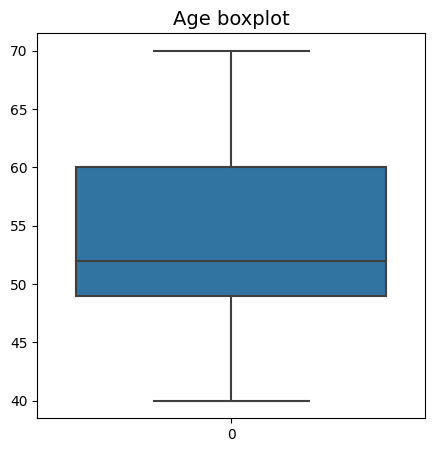

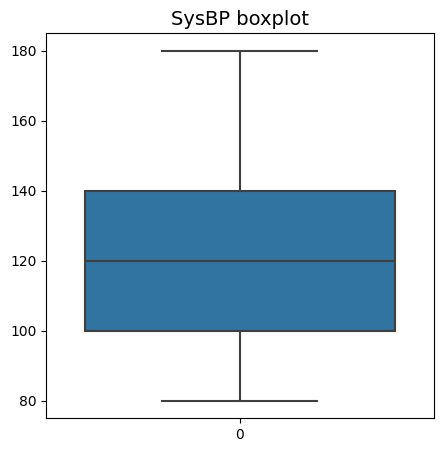

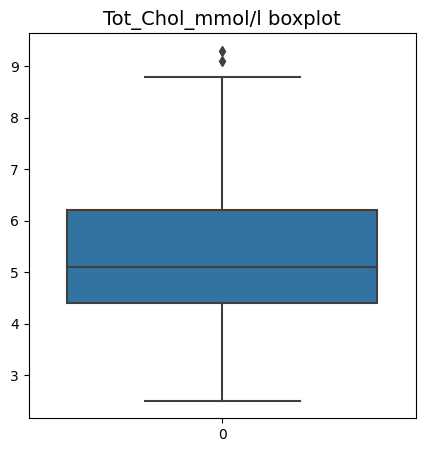

In [116]:
# Plotting the numerical variables in  the dataset
for feature in numeric_features:
    plt.figure(figsize=(5,5), facecolor='w')
    sns.boxplot(data=Bangladesh_df[feature])
    plt.title(f'{feature} boxplot', fontsize=14)
    plt.show()

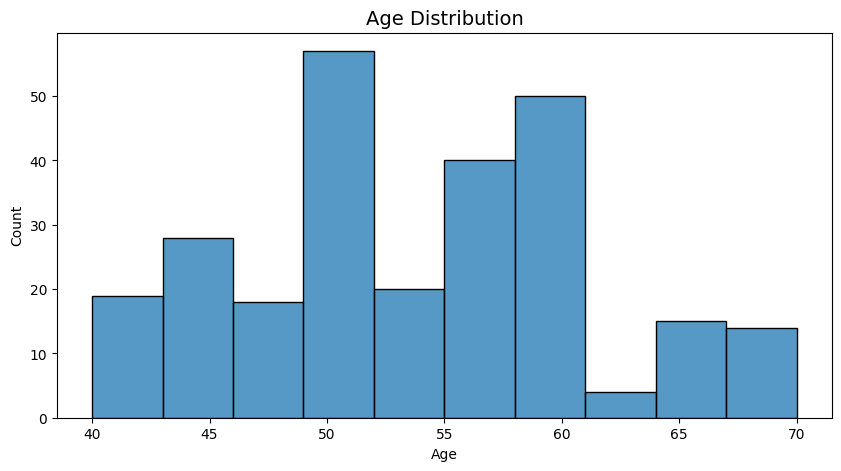

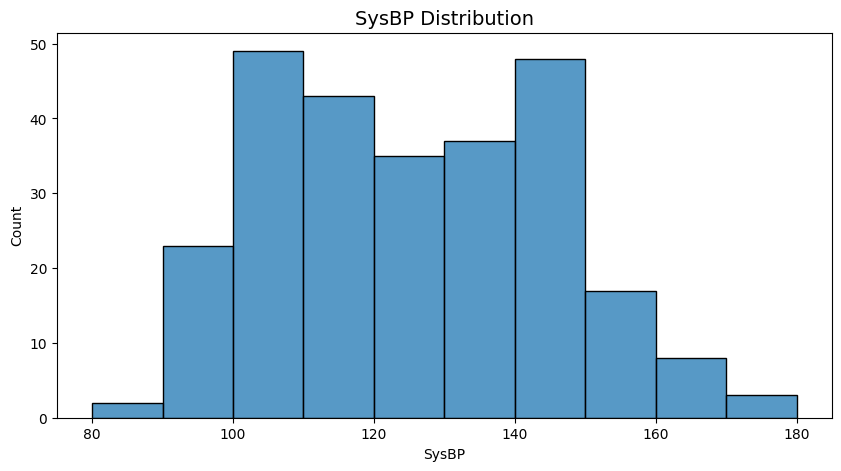

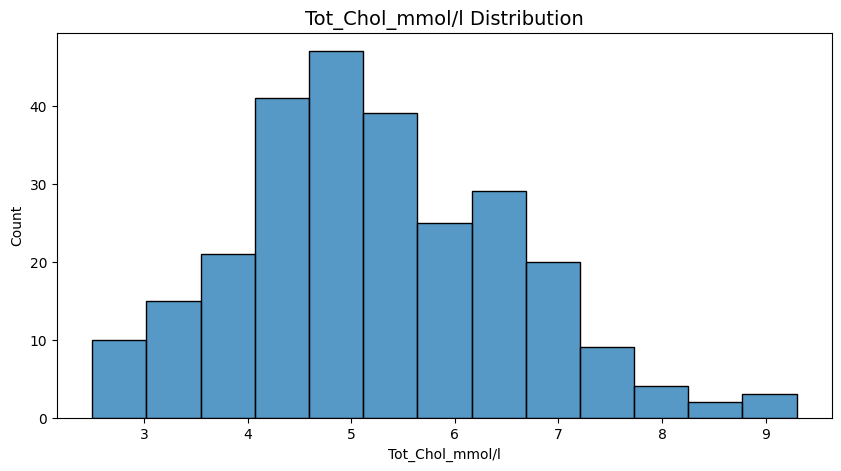

In [117]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(Bangladesh_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- Age distribution is uneven distribution.
- However, Systolic blood pressure "SysBP" distribution and total cholesterol distribution are almost normal.

In [118]:
# Checking the brief statistical properities of the categorical variables in the dataset
for feature in categorical_features:
    print(feature,':')
    print(Bangladesh_df[feature].value_counts())
    print("-----------------")

Gender :
1    265
Name: Gender, dtype: int64
-----------------
Diabetes :
0    219
1     46
Name: Diabetes, dtype: int64
-----------------
Smoking :
0    146
1    119
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    246
1     19
Name: CVD risk, dtype: int64
-----------------


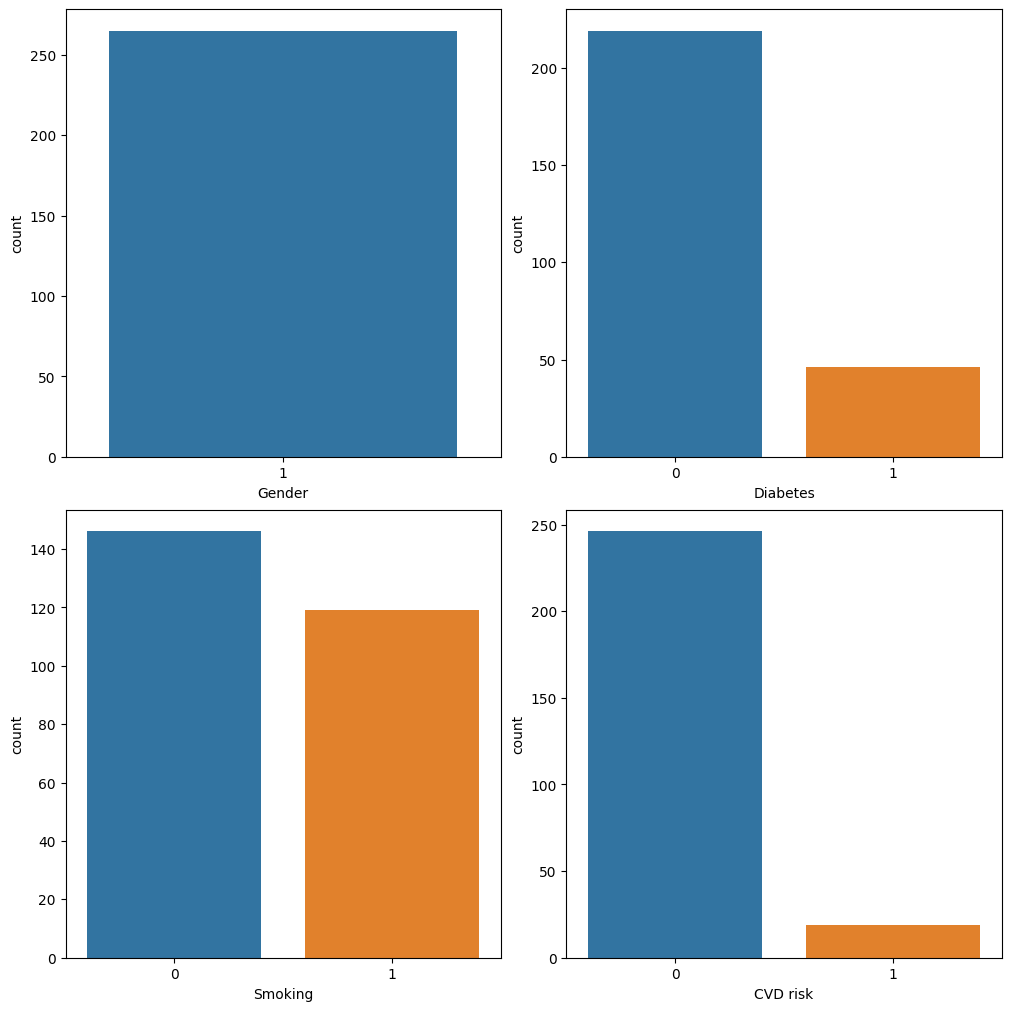

In [119]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(5*total_cols, 5*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=Bangladesh_df, ax=axs[row][pos])

Among the categorical features:
* The `Gender` of this dataset is known to be all female. 
* `Diabetes` are  imbalanced.
* The target labl `CVD risk` is also showing high class imbalance

### 4. India Osteoarthritis center dataset

In [120]:
#Reading and converting the data into a pandas dataframe
Osteoarthritis_center_df = pd.read_excel(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Lab based Datasets/India Osteoarthritis ptns/Final_data.xlsx")

# Informtion about the raw dataset
Osteoarthritis_center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 23 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   S. NO.                                              225 non-null    int64  
 1   AGE                                                 225 non-null    int64  
 2   GENDER                                              225 non-null    int64  
 3   ETHNICITY                                           225 non-null    int64  
 4   BG PRASAD SES                                       225 non-null    int64  
 5   HEIGHT                                              225 non-null    float64
 6   WEIGHT                                              225 non-null    int64  
 7   BMI                                                 225 non-null    float64
 8   H/O/ CVD                                            225 non-null    object 
 9  

C:\Users\Mo Darwesh\anaconda3\envs\CVD_Risk\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


#### Background
- Data for: Assessment of cardiovascular risk factors in patients with Knee Osteoarthritis in india.

##### Citaion:
> `Goel, Sagar (2021), Assessment of cardiovascular risk factors in patients with Knee Osteoarthritis, Dryad, Dataset, https://doi.org/10.5061/dryad.79cnp5htv`

In [121]:
# Checking Missing values in the dataset

num_Missing_values_Osteoarthritis_center = Osteoarthritis_center_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_Osteoarthritis_center, '\n')

# Checking dupicated values in the dataset
duplicates_Osteoarthritis_center = Osteoarthritis_center_df.duplicated().sum()
if duplicates_Osteoarthritis_center:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_Osteoarthritis_center))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  0 

Dataset contains no Duplicate Values


####  Data Preprocessing and Cleaning 
For our Machine learning pipeline, the office-based CVD risk screening variables will be defined with the following uniforms description and types: 
 
| Column | Description |
| ------ | ----------- |
| Age | **(float) in years** |
| Gender |**(categorical code) 1: Female, 2: Male**|
| SysBP |**(float) Systolic blood pressure** |
| Diabetes |**(categorical code) 1: Diabetic, 0: Non-Diabetic** |
| Smoking |**(categorical code) 1: Smoker, 0: Non-Smoker** |
| Tot_Chol_mmol/l | **(float) Total cholesterol by mmol/l** | 
| CVD risk |**Target label (binary) 1: Presence of CVD,  0: absence of CVD**|

In [122]:
# define variable columns based on lab-based CVD screening strategy
Osteoarthritis_center_df = Osteoarthritis_center_df.loc[:,['AGE',
                                                           'GENDER',
                                                           'SBP',
                                                           'History of Diabetes Mellitis',
                                                           'SMOKER',
                                                           'TC',
                                                           'JBS3 (%) (10 years risk of developing CVD)']]
Osteoarthritis_center_df.head(10)

,AGE,GENDER,SBP,History of Diabetes Mellitis,SMOKER,TC,JBS3 (%) (10 years risk of developing CVD)
0,3,1,110,N,N,260,14.0
1,1,2,100,N,Y,208,35.0
2,2,1,120,N,N,139,5.9
3,2,2,100,N,Y,158,14.0
4,2,2,140,N,N,201,10.0
5,2,1,130,N,N,160,8.5
6,3,2,140,N,Y,136,27.0
7,2,2,110,N,Y,157,12.0
8,1,1,140,N,N,248,9.2
9,1,1,130,N,N,192,11.0


In [123]:
# Uniforming the columns names
Osteoarthritis_center_df.rename({'AGE': 'Age', 
                      'GENDER': 'Gender',
                      'SBP': 'SysBP',
                      'History of Diabetes Mellitis' : 'Diabetes',
                      'SMOKER' : 'Smoking',
                      'TC' : 'Tot_Chol_mmol/l',
                      'JBS3 (%) (10 years risk of developing CVD)' : 'CVD risk'}, axis = 1, inplace = True)
Osteoarthritis_center_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,3,1,110,N,N,260,14.0
1,1,2,100,N,Y,208,35.0
2,2,1,120,N,N,139,5.9
3,2,2,100,N,Y,158,14.0
4,2,2,140,N,N,201,10.0


In [124]:
Osteoarthritis_center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              225 non-null    int64  
 1   Gender           225 non-null    int64  
 2   SysBP            225 non-null    int64  
 3   Diabetes         225 non-null    object 
 4   Smoking          225 non-null    object 
 5   Tot_Chol_mmol/l  225 non-null    int64  
 6   CVD risk         225 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 12.4+ KB


In [125]:
# Studying the categories of each variable coulumn
print(f'Categories of Age column: {Osteoarthritis_center_df["Age"].unique()} ')
print(f'Categories of Gender column: {Osteoarthritis_center_df["Gender"].unique()} ')
print(f'Categories of Diabetes column: {Osteoarthritis_center_df["Diabetes"].unique()} ')
print(f'Categories of Smoking column: {Osteoarthritis_center_df["Smoking"].unique()} ')


Categories of Age column: [3 1 2 4 6 5 7] 
Categories of Gender column: [1 2] 
Categories of Diabetes column: ['N' 'Y'] 
Categories of Smoking column: ['N' 'Y'] 


In [126]:
# Converting categories of Age variables to random numeric values within the specified range
# Categories ranges are specified in the excel sheet of the dataset
Osteoarthritis_center_df['Age']= Osteoarthritis_center_df['Age'].apply(lambda x:
                                                                       round(random.uniform(50, 55), 1) if 1 
                                                                       else round(random.uniform(56, 60), 1) if 2
                                                                       else round(random.uniform(61, 65), 1) if 3
                                                                       else round(random.uniform(66, 70), 1) if 4
                                                                       else round(random.uniform(71, 75), 1) if 5
                                                                       else round(random.uniform(76, 80), 1) if 6
                                                                       else round(random.uniform(81, 85), 1) if 7
                                                                       else None ) 


# Defining the correct type of the SysBP variable
Osteoarthritis_center_df['SysBP'] = Osteoarthritis_center_df['SysBP'].astype("float")

# Correcting categories of Diabetes variables
Osteoarthritis_center_df['Diabetes'].replace({'N' : 0,'Y': 1}, inplace = True)

# Correcting categories of Smoking variables
Osteoarthritis_center_df['Smoking'].replace({'N' : 0,'Y': 1}, inplace = True)

# Converting value of the total cholesterol to mmol/l
Osteoarthritis_center_df['Tot_Chol_mmol/l']=Osteoarthritis_center_df['Tot_Chol_mmol/l'].apply(lambda x:round(x*0.02586,1)) 
#To get from mg/dL to SI (in mmol/L) multiply by 0.02586.

# Correcting categories of CVD risk variables
Osteoarthritis_center_df['CVD risk'] = Osteoarthritis_center_df['CVD risk'].apply(lambda x: 1 if x >= 20  else 0)

Osteoarthritis_center_df.head(10)

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,50.5,1,110.0,0,0,6.7,0
1,50.8,2,100.0,0,1,5.4,1
2,51.6,1,120.0,0,0,3.6,0
3,51.3,2,100.0,0,1,4.1,0
4,54.3,2,140.0,0,0,5.2,0
5,54.4,1,130.0,0,0,4.1,0
6,54.4,2,140.0,0,1,3.5,1
7,53.3,2,110.0,0,1,4.1,0
8,51.8,1,140.0,0,0,6.4,0
9,54.7,1,130.0,0,0,5.0,0


In [127]:
# Checking the brief statistical properities of the numerical variables in the dataset

Osteoarthritis_center_df[numeric_features].describe()

,Age,SysBP,Tot_Chol_mmol/l
count,225.000000,225.000000,225.000000
mean,52.738667,135.964444,5.302222
std,1.466856,17.597650,0.945877
min,50.100000,100.000000,2.900000
25%,51.700000,124.000000,4.700000
50%,52.900000,130.000000,5.300000
75%,54.000000,148.000000,5.800000
max,55.000000,190.000000,7.800000


#### Observations

- Age has normal but narrow range between 50 to 55 years.
- Systolic blood pressure "SysBP" has normal range between 100 to 190 mmHg
- Total cholesterol has normal range between 2.9 to 7.8 mmol/L.

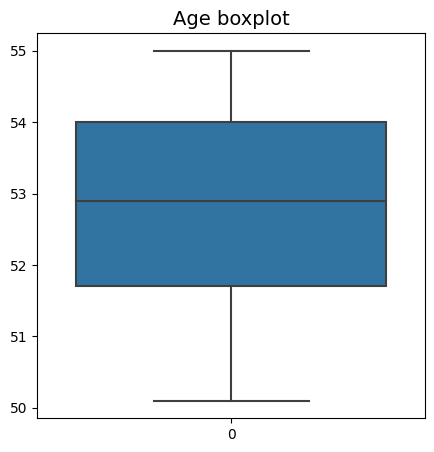

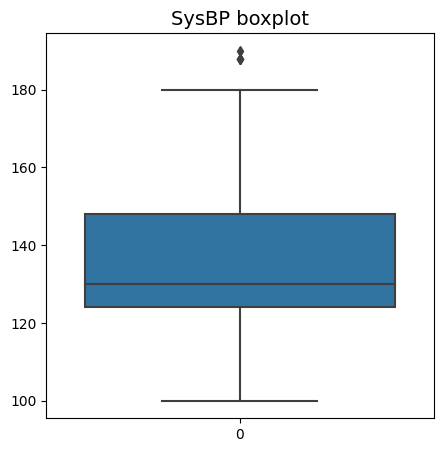

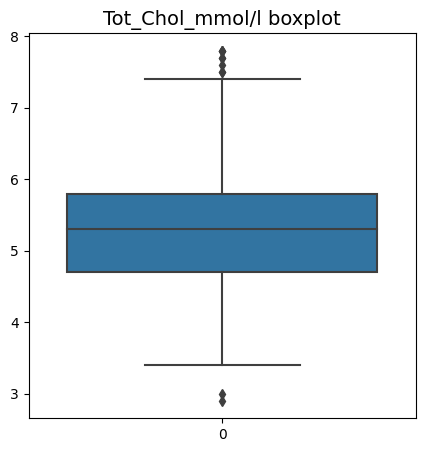

In [128]:
# Plotting the numerical variables in  the dataset
for feature in numeric_features:
    plt.figure(figsize=(5,5), facecolor='w')
    sns.boxplot(data=Osteoarthritis_center_df[feature])
    plt.title(f'{feature} boxplot', fontsize=14)
    plt.show()

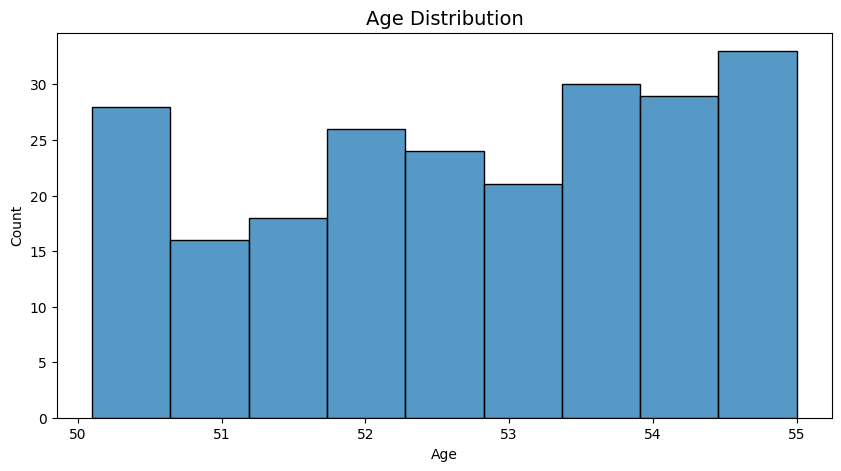

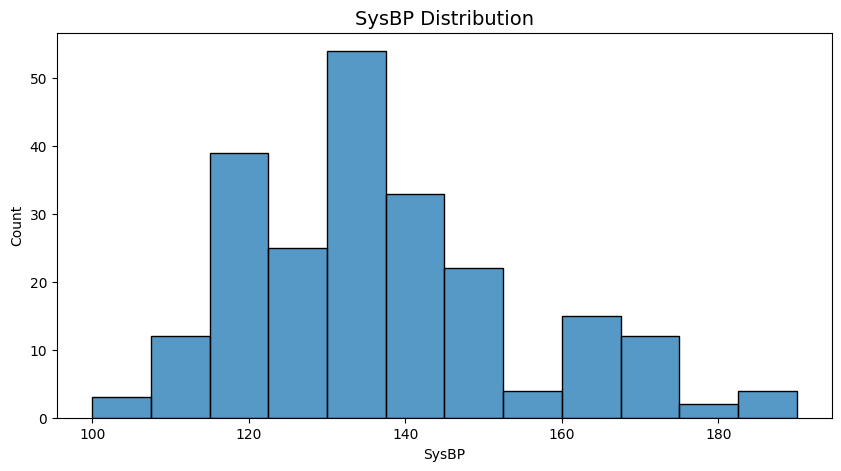

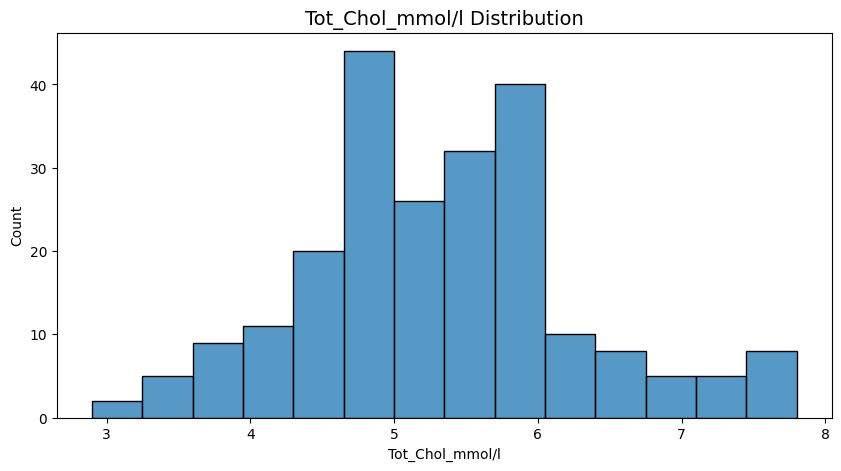

In [129]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(Osteoarthritis_center_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- Age distribution is almost uniform distribution.
- However, Systolic blood pressure "SysBP" distribution and total cholesterol distribution are almost normal.

In [130]:
# Checking the brief statistical properities of the categorical variables in the dataset

for feature in categorical_features:
    print(feature,':')
    print(Osteoarthritis_center_df[feature].value_counts())
    print("-----------------")

Gender :
1    133
2     92
Name: Gender, dtype: int64
-----------------
Diabetes :
0    167
1     58
Name: Diabetes, dtype: int64
-----------------
Smoking :
0    184
1     41
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    178
1     47
Name: CVD risk, dtype: int64
-----------------


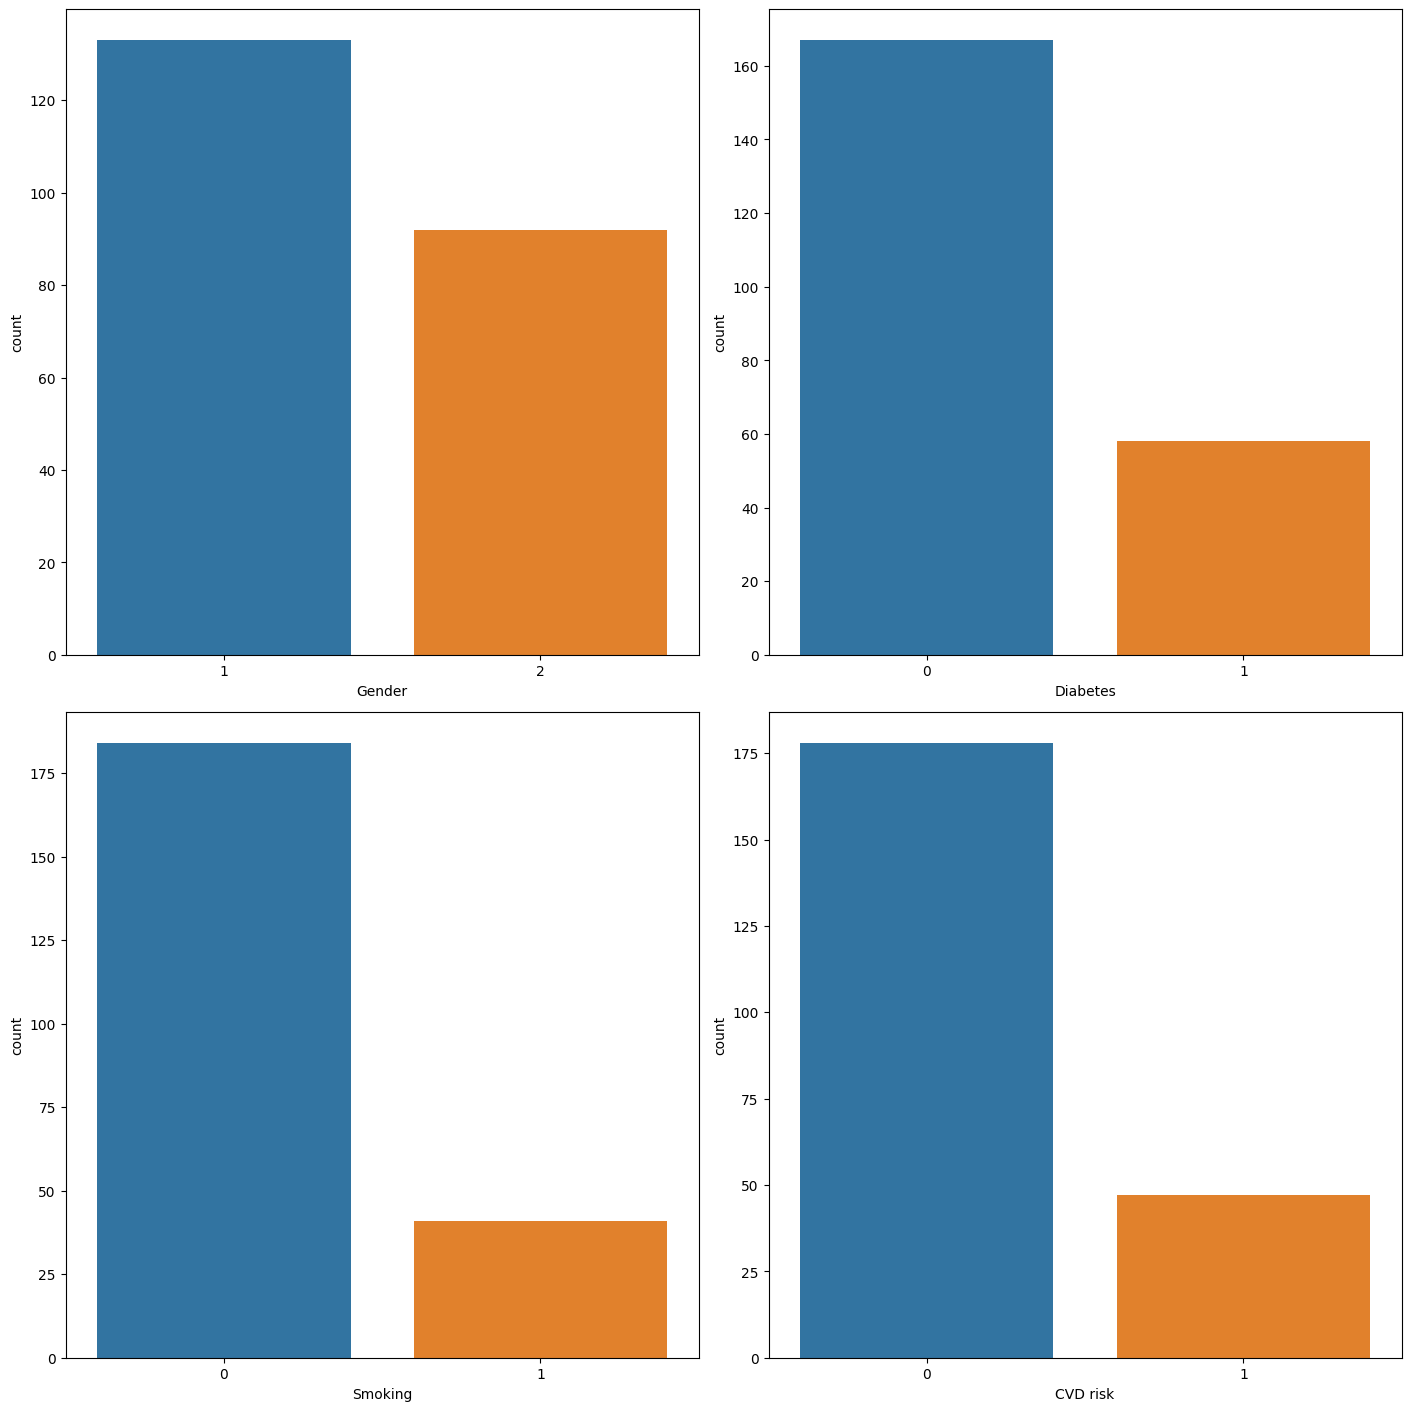

In [131]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=Osteoarthritis_center_df, ax=axs[row][pos])

Among the categorical features:
* `Diabetes` and `Smoking` are  imbalanced.
* The target labl `CVD risk` is also showing some class imbalance

### 5. South India fibromyalgia center dataset 

In [132]:
# Reading and converting the data into a pandas dataframe
India_fibromyalgia_df = pd.read_csv(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Lab based Datasets/South india fibromyalgia center/ascvd_10yr.csv")

# Informtion about the raw dataset
India_fibromyalgia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          139 non-null    int64  
 1   Height       137 non-null    float64
 2   Weight       136 non-null    float64
 3   BMI          136 non-null    float64
 4   SBP          139 non-null    int64  
 5   DBP          138 non-null    float64
 6   DM           139 non-null    int64  
 7   DLP          139 non-null    int64  
 8   HTN          139 non-null    int64  
 9   Hypot3       139 non-null    int64  
 10  Smoker       139 non-null    int64  
 11  Disease_dur  138 non-null    float64
 12  FIQR         137 non-null    float64
 13  BPI_tot      138 non-null    float64
 14  BPI_avg      138 non-null    float64
 15  ESR          139 non-null    int64  
 16  CRP          136 non-null    float64
 17  Tot_chol     139 non-null    int64  
 18  LDL          139 non-null    int64  
 19  HDL     

#### Background
- Data for the study of "Cardiovascular risk assessment using ASCVD risk score in fibromyalgia – A single centre, retrospective study using “traditional” case-control methodology and “novel” machine learning".

##### Citaion:
> ` Surendran, Sandeep; CB., Mithun; Moni, Merlin; Tiwari, Arun; Pradeep, Manu (2021), “Cardiovascular risk assessment using ASCVD risk score in fibromyalgia – A single centre, retrospective study using “traditional” case-control methodology and “novel” machine learning.”, Mendeley Data, V1, doi: 10.17632/hvmxhjtzm9.1`



In [133]:
# Checking Missing values in the dataset

num_Missing_values_India_fibromyalgia = India_fibromyalgia_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_India_fibromyalgia, '\n')

# Checking dupicated values in the dataset
duplicates_India_fibromyalgia = India_fibromyalgia_df.duplicated().sum()
if duplicates_India_fibromyalgia:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_India_fibromyalgia))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  19 

Dataset contains no Duplicate Values


####  Data Preprocessing and Cleaning 
For our Machine learning pipeline, the office-based CVD risk screening variables will be defined with the following uniforms description and types: 
 
| Column | Description |
| ------ | ----------- |
| Age | **(float) in years** |
| Gender |**(categorical code) 1: Female, 2: Male**|
| SysBP |**(float) Systolic blood pressure** |
| Diabetes |**(categorical code) 1: Diabetic, 0: Non-Diabetic** |
| Smoking |**(categorical code) 1: Smoker, 0: Non-Smoker** |
| Tot_Chol_mmol/l | **(float) Total cholesterol by mmol/l** | 
| CVD risk |**Target label (binary) 1: Presence of CVD,  0: absence of CVD**|

In [134]:
# define variable columns based on lab-based CVD screening strategy
India_fibromyalgia_df = India_fibromyalgia_df.loc[:,['Age',
                                                     'SBP',
                                                     'DM',
                                                     'Smoker',
                                                     'Tot_chol',
                                                     '10_yr']]
India_fibromyalgia_df.head()

,Age,SBP,DM,Smoker,Tot_chol,10_yr
0,32,110,0,0,121,0
1,59,130,0,0,132,0
2,54,140,0,0,134,0
3,52,160,1,0,135,1
4,60,150,0,0,140,0


In [135]:
# Uniforming the columns names
India_fibromyalgia_df.rename({'Age': 'Age', 
                      'SBP': 'SysBP',
                      'DM' : 'Diabetes',
                      'Smoker' : 'Smoking',
                      'Tot_chol' : 'Tot_Chol_mmol/l',
                      '10_yr' : 'CVD risk'}, axis = 1, inplace = True)

India_fibromyalgia_df['Gender'] = 1 # all dataset are female patients with fibromyalgia.

India_fibromyalgia_df.head()

,Age,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk,Gender
0,32,110,0,0,121,0,1
1,59,130,0,0,132,0,1
2,54,140,0,0,134,0,1
3,52,160,1,0,135,1,1
4,60,150,0,0,140,0,1


In [136]:
# Studying the categories of each variable coulumn

print(f'Categories of Diabetes column: {India_fibromyalgia_df["Diabetes"].unique()} ')
print(f'Categories of Smoking column: {India_fibromyalgia_df["Smoking"].unique()} ')
print(f'Categories of CVD risk column: {India_fibromyalgia_df["CVD risk"].unique()} ')

Categories of Diabetes column: [0 1] 
Categories of Smoking column: [0] 
Categories of CVD risk column: [0 1] 


In [137]:
# Defining the correct type of the Age variable
India_fibromyalgia_df['Age'] = India_fibromyalgia_df['Age'].astype("float")

# Defining the correct type of the SysBP variable
India_fibromyalgia_df['SysBP'] = India_fibromyalgia_df['SysBP'].astype("float")

# Converting value of the total cholesterol to mmol/l
India_fibromyalgia_df['Tot_Chol_mmol/l']= India_fibromyalgia_df['Tot_Chol_mmol/l'].apply(lambda x:round(x*0.02586,1)) 
#To get from mg/dL to SI (in mmol/L) multiply by 0.02586.

India_fibromyalgia_df.head(10)

,Age,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk,Gender
0,32.0,110.0,0,0,3.1,0,1
1,59.0,130.0,0,0,3.4,0,1
2,54.0,140.0,0,0,3.5,0,1
3,52.0,160.0,1,0,3.5,1,1
4,60.0,150.0,0,0,3.6,0,1
5,69.0,140.0,1,0,3.7,1,1
6,38.0,100.0,0,0,3.7,0,1
7,35.0,100.0,0,0,3.7,0,1
8,52.0,160.0,0,0,3.7,0,1
9,35.0,110.0,0,0,3.7,0,1


In [138]:
India_fibromyalgia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              139 non-null    float64
 1   SysBP            139 non-null    float64
 2   Diabetes         139 non-null    int64  
 3   Smoking          139 non-null    int64  
 4   Tot_Chol_mmol/l  139 non-null    float64
 5   CVD risk         139 non-null    int64  
 6   Gender           139 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 7.7 KB


In [139]:
# Checking varible coulmns with Missing values in the dataset
India_fibromyalgia_df.isna().sum()

Age                0
SysBP              0
Diabetes           0
Smoking            0
Tot_Chol_mmol/l    0
CVD risk           0
Gender             0
dtype: int64

In [140]:
# Checking the brief statistical properities of the numerical variables in the dataset

India_fibromyalgia_df[numeric_features].describe()

,Age,SysBP,Tot_Chol_mmol/l
count,139.000000,139.000000,139.000000
mean,47.057554,130.546763,5.256115
std,10.317264,21.868587,1.137319
min,21.000000,100.000000,2.400000
25%,42.000000,117.000000,4.400000
50%,48.000000,125.000000,5.300000
75%,54.000000,140.000000,5.900000
max,72.000000,220.000000,9.200000


#### Observations

- Age has normal but narrow range between 21 to 72 years.
- Systolic blood pressure "SysBP" has normal range between 100 to 220 mmHg
- Total cholesterol has normal range between 2.4 to 9.2 mmol/L.

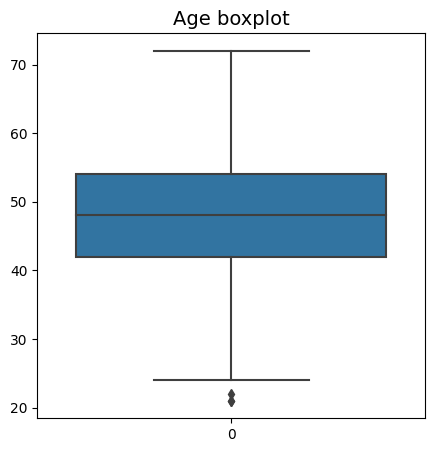

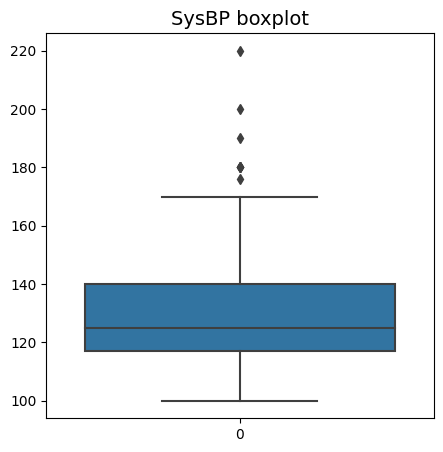

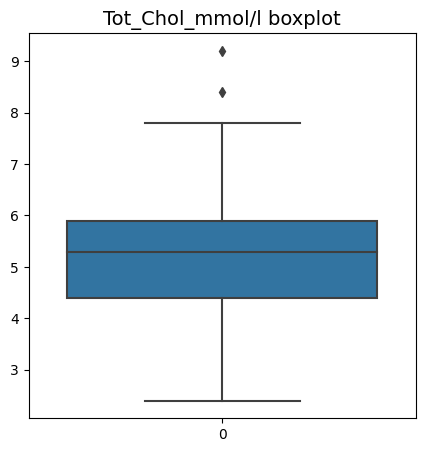

In [141]:
# Plotting the numerical variables in  the dataset
for feature in numeric_features:
    plt.figure(figsize=(5,5), facecolor='w')
    sns.boxplot(data=India_fibromyalgia_df[feature])
    plt.title(f'{feature} boxplot', fontsize=14)
    plt.show()

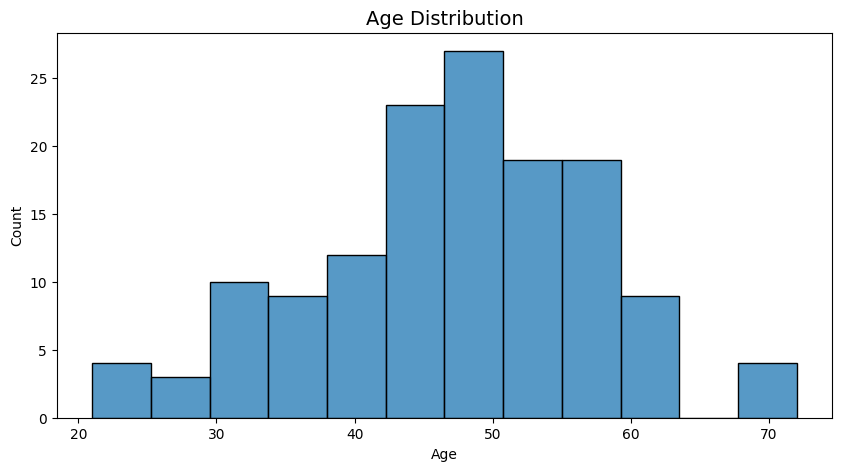

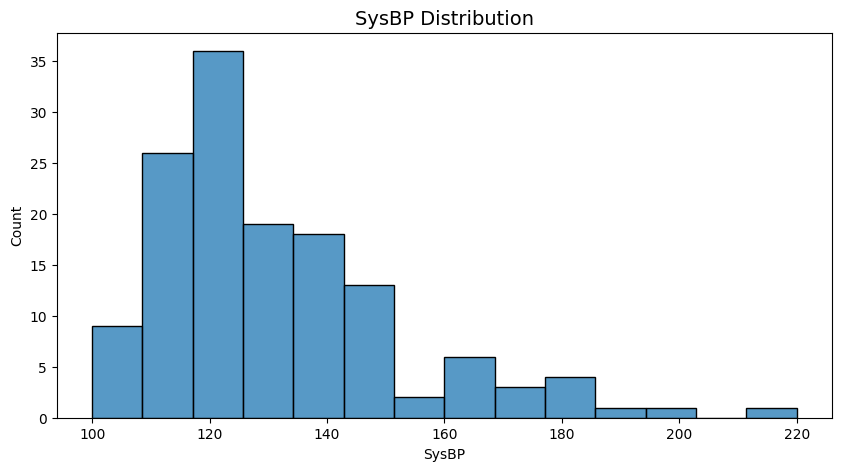

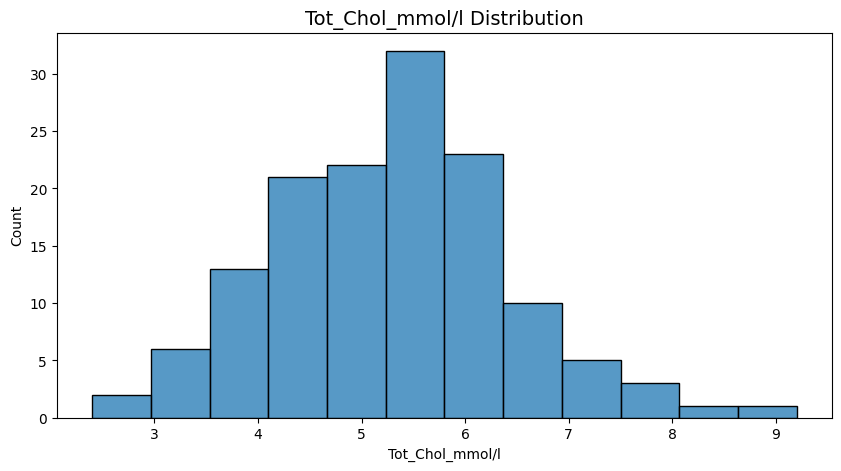

In [142]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(India_fibromyalgia_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- Systolic blood pressure "SysBP" distribution is right skewed distribution.
- However, Age distribution and total cholesterol distribution are almost normal.

In [143]:
# Checking the brief statistical properities of the categorical variables in the dataset

for feature in categorical_features:
    print(feature,':')
    print(India_fibromyalgia_df[feature].value_counts())
    print("-----------------")

Gender :
1    139
Name: Gender, dtype: int64
-----------------
Diabetes :
0    120
1     19
Name: Diabetes, dtype: int64
-----------------
Smoking :
0    139
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    129
1     10
Name: CVD risk, dtype: int64
-----------------


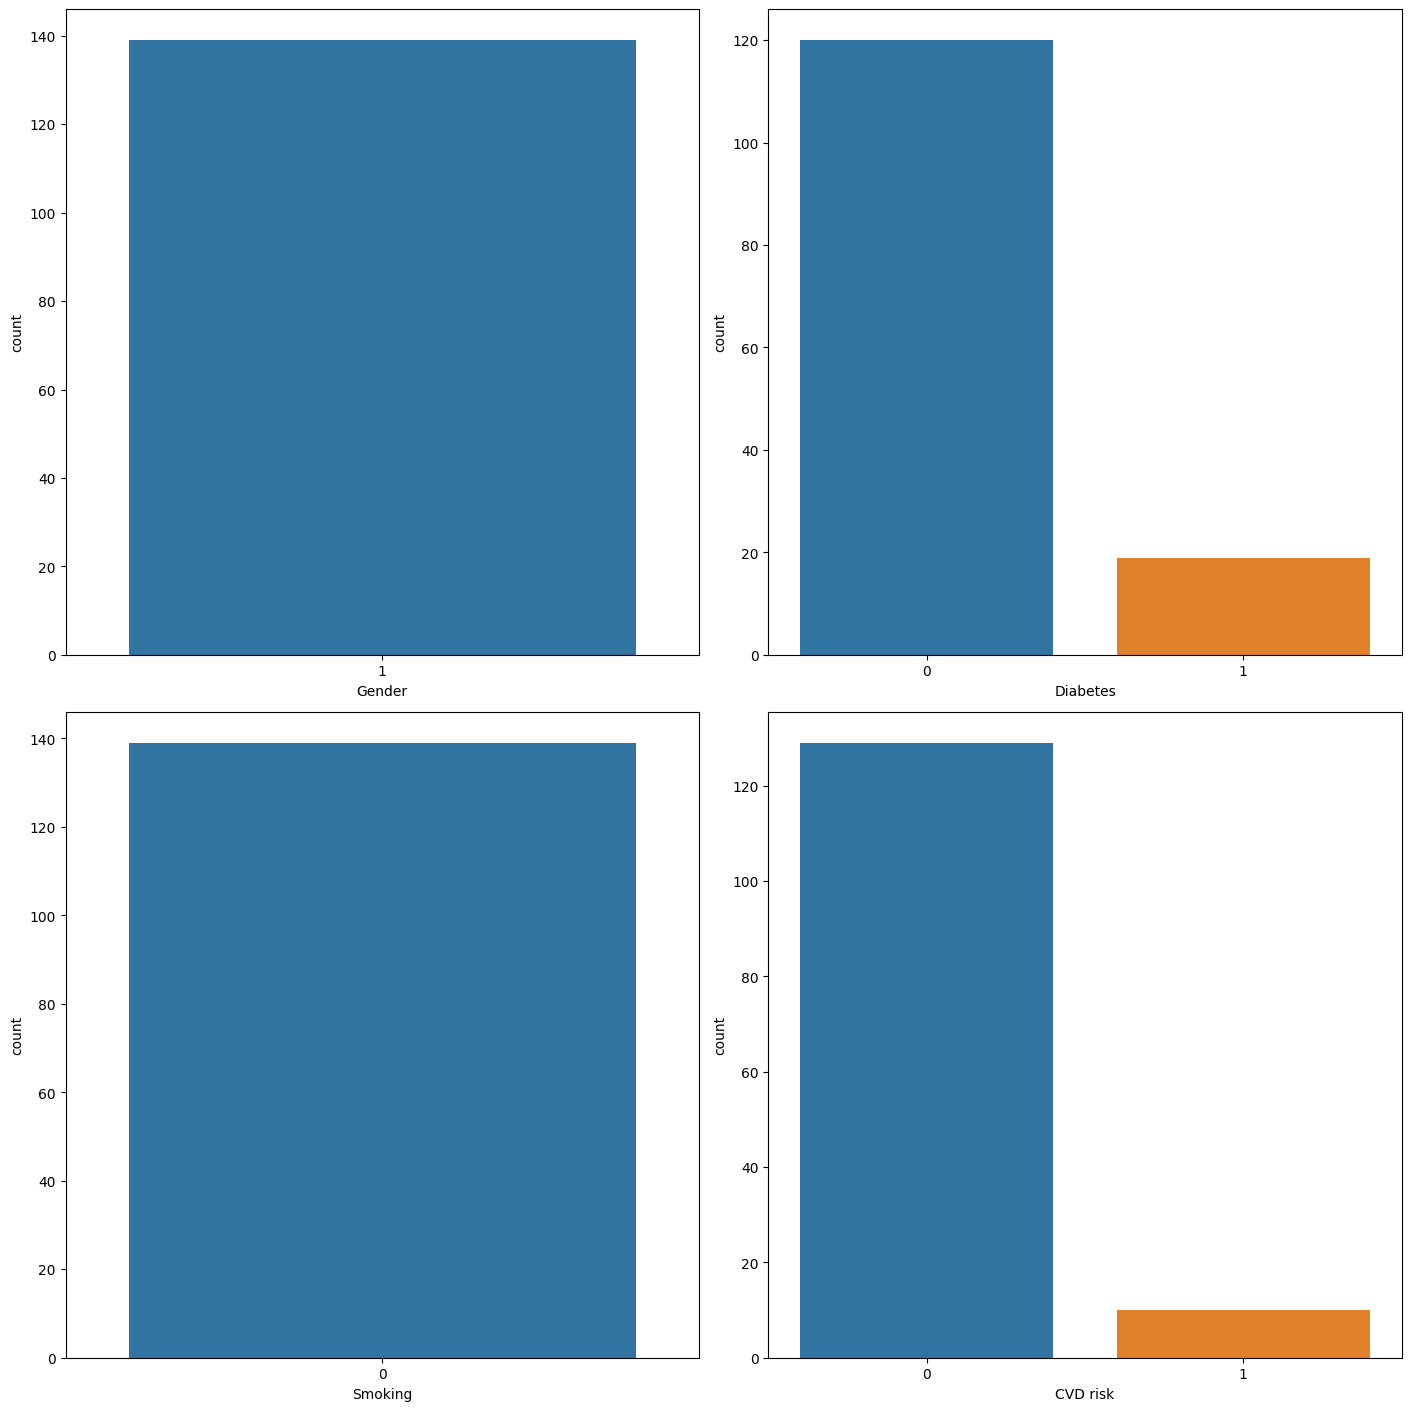

In [144]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=India_fibromyalgia_df, ax=axs[row][pos])

Among the categorical features:
* All cases are non-smoker females 
* `Diabetes` is  imbalanced.
* The target labl `CVD risk` is also showing some class imbalance

### 6. Italy dataset

In [145]:
# Reading and converting the data into a pandas dataframe
Italy_df = pd.read_excel(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Lab based Datasets/Italy/Dati rischio CV.xlsx")

# Informtion about the raw dataset
Italy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Regione          300 non-null    int64  
 1   sex              300 non-null    int64  
 2   age              300 non-null    int64  
 3   FasceEtà         300 non-null    int64  
 4   scolarità        300 non-null    int64  
 5   FasciaScolar     300 non-null    int64  
 6   statciv          300 non-null    int64  
 7   occupazione      300 non-null    int64  
 8   Diagnosi         300 non-null    int64  
 9   DiagnosiSchDB    300 non-null    int64  
 10  Etàesordio       300 non-null    object 
 11  Durata           300 non-null    object 
 12  Numepisodi       300 non-null    object 
 13  TS               300 non-null    int64  
 14  TSnum            300 non-null    object 
 15  Comorbpsi        114 non-null    object 
 16  ComorbMed        211 non-null    object 
 17  Terapia         

#### Background
- Data for the study of "Cardiovascular risk in severe mental illness in Italy".
- Patients with serious mental illness (schizophrenia or bipolar disorder) consecutively admitted to the inpatients units in Milan and Genova (Italy). 

##### Citaion:
> `Salvi, Virginio (2022), “Cardiovascular risk in severe mental illness in Italy”, Mendeley Data, V1, doi: 10.17632/k3pjsptkfk.1`


In [146]:
# Checking Missing values in the dataset

num_Missing_values_Italy = Italy_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_Italy, '\n')

# Checking dupicated values in the dataset
duplicates_Italy = Italy_df.duplicated().sum()
if duplicates_Italy:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_Italy))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  279 

Dataset contains no Duplicate Values


####  Data Preprocessing and Cleaning 
For our Machine learning pipeline, the office-based CVD risk screening variables will be defined with the following uniforms description and types: 
 
| Column | Description |
| ------ | ----------- |
| Age | **(float) in years** |
| Gender |**(categorical code) 1: Female, 2: Male**|
| SysBP |**(float) Systolic blood pressure** |
| Diabetes |**(categorical code) 1: Diabetic, 0: Non-Diabetic** |
| Smoking |**(categorical code) 1: Smoker, 0: Non-Smoker** |
| Tot_Chol_mmol/l | **(float) Total cholesterol by mmol/l** | 
| CVD risk |**Target label (binary) 1: Presence of CVD,  0: absence of CVD**|

In [147]:
# define variable columns based on lab-based CVD screening strategy
Italy_df = Italy_df.loc[:,['age',
                           'sex',
                           'sysBP',
                           'Diabete',
                           'Smoking',
                           'ColestTot',
                           'RischioCV']]
Italy_df.head()

,age,sex,sysBP,Diabete,Smoking,ColestTot,RischioCV
0,48,1,190,1,0,239,5.1
1,40,0,125,1,1,174,2.3
2,68,0,140,1,0,144,9.3
3,55,1,130,1,0,216,2.0
4,62,1,130,1,0,154,5.6


In [148]:
# Uniforming the columns names
Italy_df.rename({'age': 'Age',
                 'sex': 'Gender',
                 'sysBP': 'SysBP',
                 'Diabete' : 'Diabetes',
                 'Smoking' : 'Smoking',
                 'ColestTot' : 'Tot_Chol_mmol/l',
                 'RischioCV' : 'CVD risk'}, axis = 1, inplace = True)


Italy_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,48,1,190,1,0,239,5.1
1,40,0,125,1,1,174,2.3
2,68,0,140,1,0,144,9.3
3,55,1,130,1,0,216,2.0
4,62,1,130,1,0,154,5.6


In [149]:
# Studying the categories of each variable coulumn
print(f'Categories of Gender column: {Italy_df["Gender"].unique()} ')
print(f'Categories of Diabetes column: {Italy_df["Diabetes"].unique()} ')
print(f'Categories of Smoking column: {Italy_df["Smoking"].unique()} ')

Categories of Gender column: [1 0] 
Categories of Diabetes column: [1 2] 
Categories of Smoking column: [0 1] 


In [150]:
# Defining the correct type of the Age variable
Italy_df['Age'] = Italy_df['Age'].astype("float")

# Correcting categories of Gender variables
Italy_df['Gender'].replace({1: 1, 0 : 2}, inplace = True)

# Defining the correct type of the SysBP variable
Italy_df['SysBP'] = Italy_df['SysBP'].astype("float")

# Correcting categories of Diabetes variables
Italy_df['Diabetes'].replace({1 : 0, 2: 1}, inplace = True)

# Converting value of the total cholesterol to mmol/l
Italy_df['Tot_Chol_mmol/l']=Italy_df['Tot_Chol_mmol/l'].apply(lambda x:round(x*0.02586,1)) 
#To get from mg/dL to SI (in mmol/L) multiply by 0.02586.

# Correcting categories of CVD risk variables
Italy_df['CVD risk'] = Italy_df['CVD risk'].apply(lambda x: 1 if x >= 7  else 1) 
# threshold of high-risk above 7% according to CUORE project of italy study.


Italy_df.head(10)

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,48.0,1,190.0,0,0,6.2,1
1,40.0,2,125.0,0,1,4.5,1
2,68.0,2,140.0,0,0,3.7,1
3,55.0,1,130.0,0,0,5.6,1
4,62.0,1,130.0,0,0,4.0,1
5,38.0,2,130.0,0,1,4.8,1
6,69.0,2,110.0,0,1,3.9,1
7,51.0,1,140.0,0,1,5.1,1
8,35.0,2,115.0,0,1,4.5,1
9,35.0,2,115.0,0,0,4.9,1


In [151]:
Italy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              300 non-null    float64
 1   Gender           300 non-null    int64  
 2   SysBP            300 non-null    float64
 3   Diabetes         300 non-null    int64  
 4   Smoking          300 non-null    int64  
 5   Tot_Chol_mmol/l  300 non-null    float64
 6   CVD risk         300 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 16.5 KB


In [152]:
# Checking varible coulmns with Missing values in the dataset
Italy_df.isna().sum()

Age                0
Gender             0
SysBP              0
Diabetes           0
Smoking            0
Tot_Chol_mmol/l    0
CVD risk           0
dtype: int64

In [153]:
# Checking the brief statistical properities of the numerical variables in the dataset

Italy_df[numeric_features].describe()

,Age,SysBP,Tot_Chol_mmol/l
count,300.000000,300.000000,300.000000
mean,51.903333,123.733333,4.791000
std,10.731474,13.509401,1.019059
min,35.000000,90.000000,3.100000
25%,43.000000,110.000000,4.100000
50%,52.000000,120.000000,4.600000
75%,60.000000,130.000000,5.200000
max,69.000000,190.000000,8.300000


#### Observations

- Age has normal but narrow range between 35 to 69 years.
- Systolic blood pressure "SysBP" has normal range between 90 to 190 mmHg
- Total cholesterol has normal range between 3.1 to 8.3 mmol/L.

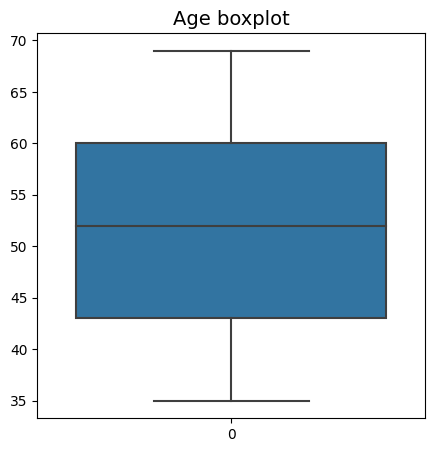

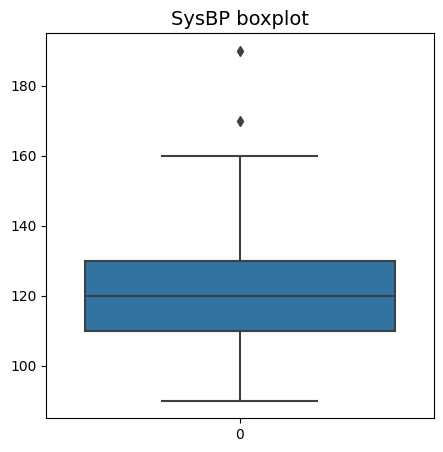

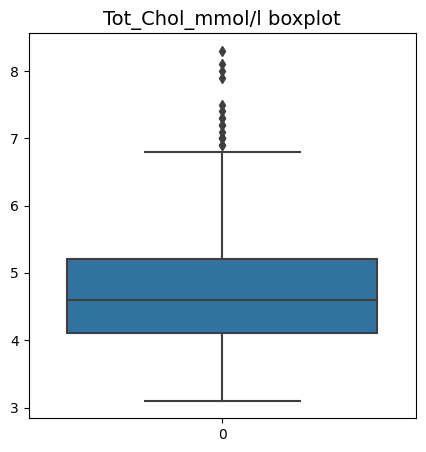

In [154]:
# Plotting the numerical variables in  the dataset
for feature in numeric_features:
    plt.figure(figsize=(5,5), facecolor='w')
    sns.boxplot(data=Italy_df[feature])
    plt.title(f'{feature} boxplot', fontsize=14)
    plt.show()

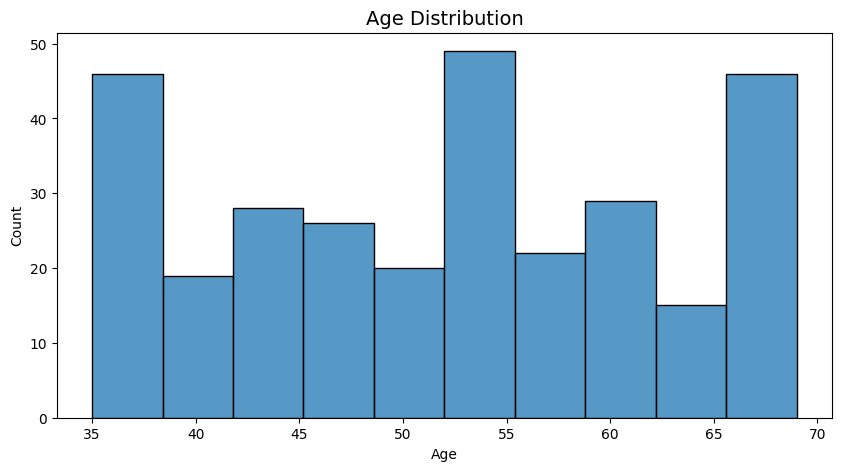

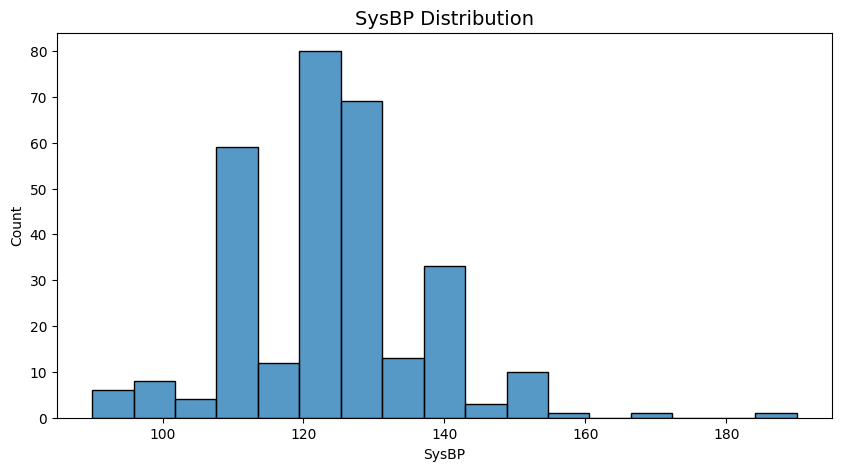

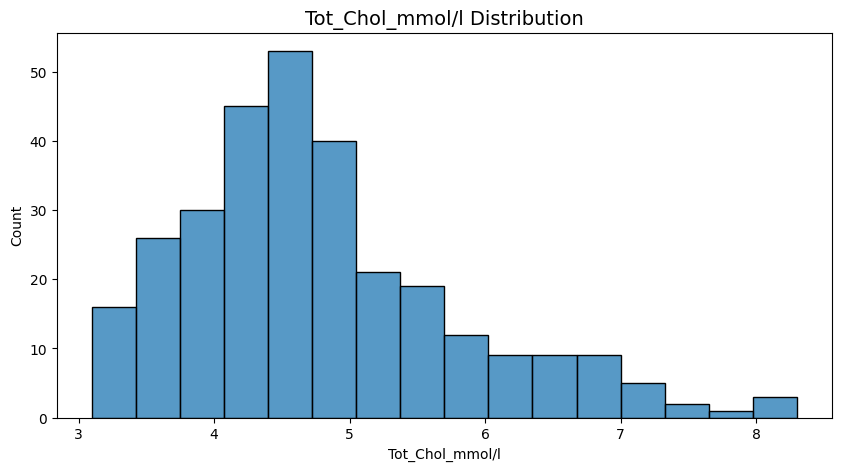

In [155]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(Italy_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations
- Age distribution is even distribution.
- Total cholesterol distribution is right skewed distribution.

In [156]:
# Checking the brief statistical properities of the categorical variables in the dataset

for feature in categorical_features:
    print(feature,':')
    print(Italy_df[feature].value_counts())
    print("-----------------")

Gender :
1    150
2    150
Name: Gender, dtype: int64
-----------------
Diabetes :
0    245
1     55
Name: Diabetes, dtype: int64
-----------------
Smoking :
1    174
0    126
Name: Smoking, dtype: int64
-----------------
CVD risk :
1    300
Name: CVD risk, dtype: int64
-----------------


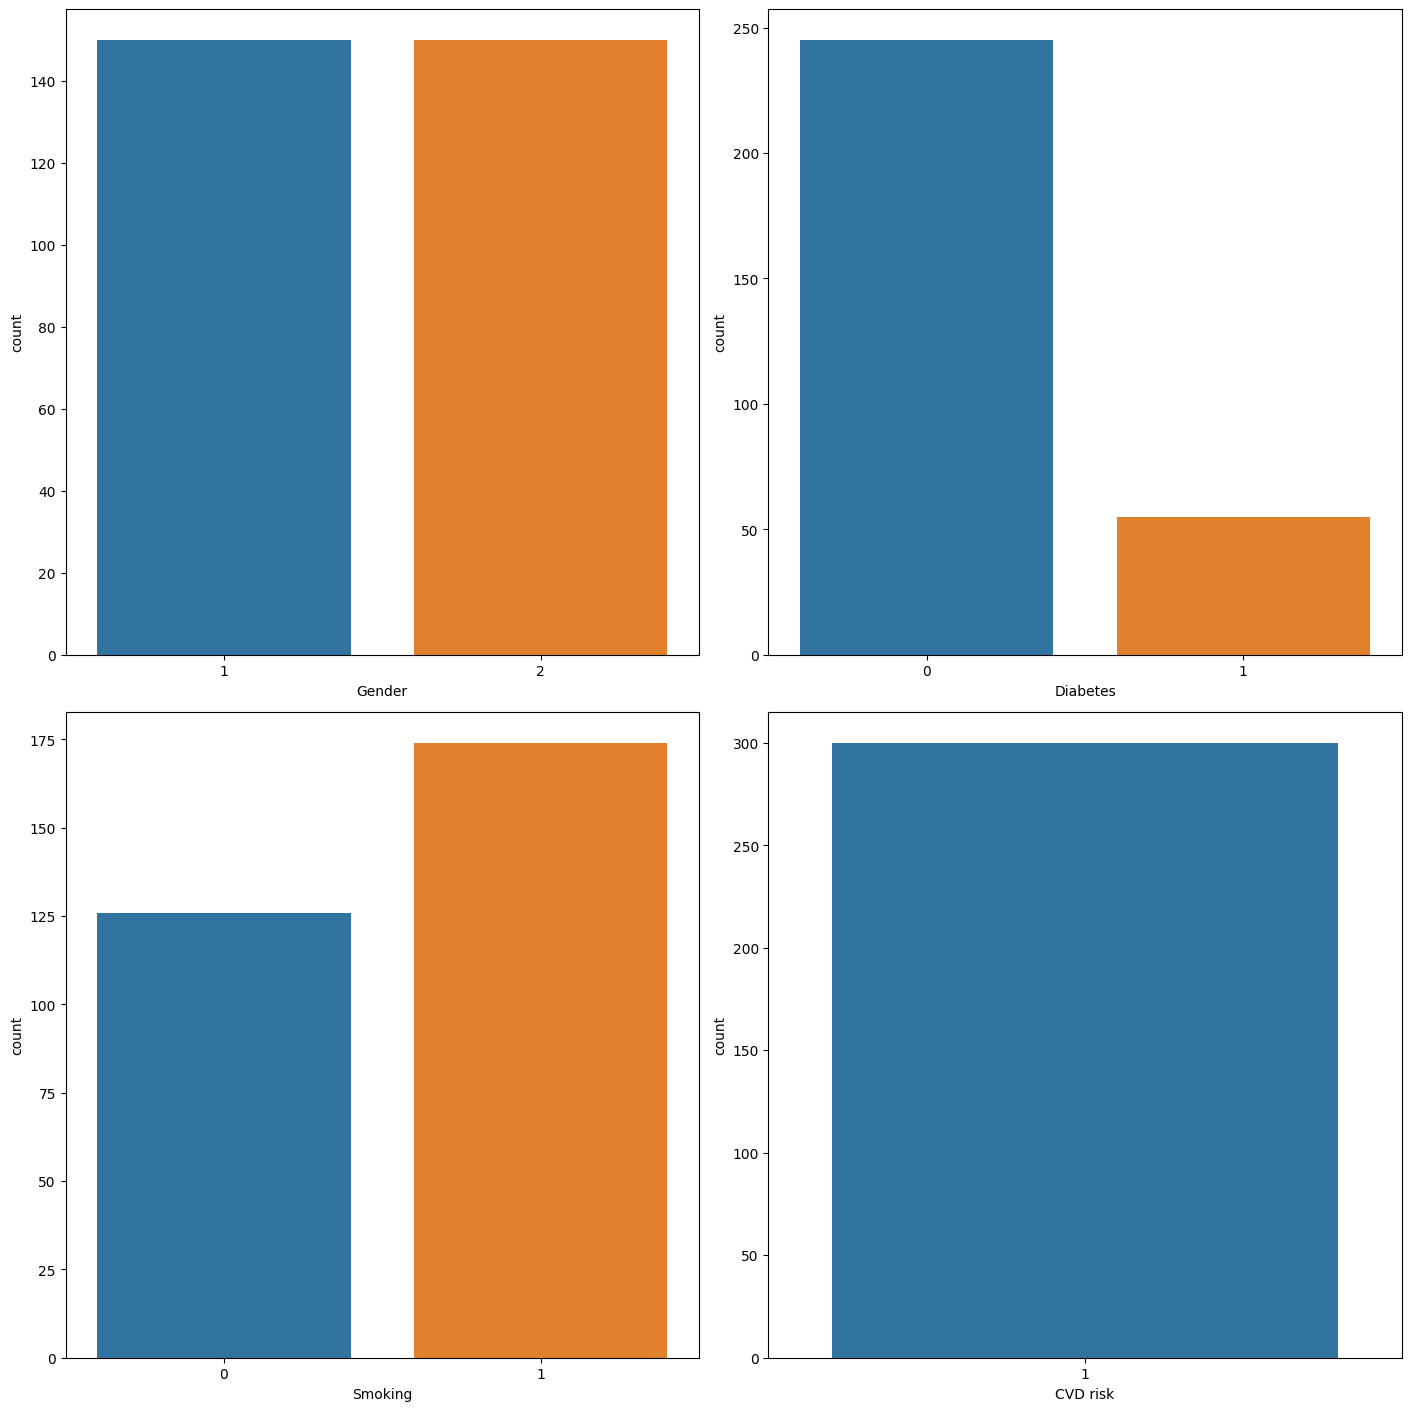

In [157]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=Italy_df, ax=axs[row][pos])

Among the categorical features:
* `Male` and `Female` are equal in the dataset.
* `Diabetes` is  imbalanced.
* The target labl `CVD risk` is also showing some class imbalance

### 7. US NHANES dataset

In [158]:
#Reading and converting the data into a pandas dataframe
NHANES_df = pd.read_csv(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Lab based Datasets/US NHANES_CVD_dataset/NHANES_CVD_dataset.csv")

# Informtion about the raw dataset
NHANES_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23415 entries, 0 to 23414
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23415 non-null  int64  
 1   age         23415 non-null  float64
 2   gender      23415 non-null  object 
 3   systolic    23415 non-null  float64
 4   chol_total  23415 non-null  float64
 5   diabetes    23415 non-null  object 
 6   priorcvd    23415 non-null  object 
 7   smoke       23415 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 1.4+ MB


#### Background
- Data for study of "Challenges in reproducing results from publicly available data: an example of sexual orientation and cardiovascular disease risk".

##### Citaion:
> `Harper, S. (2015). Replication Data for: Challenges in reproducing results from publicly available data: an example of sexual orientation and cardiovascular disease risk (V2 ed.) [Data set]. doi:10.7910/DVN/RKHRNO`

In [159]:
# Checking Missing values in the dataset

num_Missing_values_NHANES = NHANES_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_NHANES, '\n')

# Checking dupicated values in the dataset
duplicates_NHANES = NHANES_df.duplicated().sum()
if duplicates_NHANES:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_NHANES))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  0 

Dataset contains no Duplicate Values


####  Data Preprocessing and Cleaning 
For our Machine learning pipeline, the office-based CVD risk screening variables will be defined with the following uniforms description and types: 
 
| Column | Description |
| ------ | ----------- |
| Age | **(float) in years** |
| Gender |**(categorical code) 1: Female, 2: Male**|
| SysBP |**(float) Systolic blood pressure** |
| Diabetes |**(categorical code) 1: Diabetic, 0: Non-Diabetic** |
| Smoking |**(categorical code) 1: Smoker, 0: Non-Smoker** |
| Tot_Chol_mmol/l | **(float) Total cholesterol by mmol/l** | 
| CVD risk |**Target label (binary) 1: Presence of CVD,  0: absence of CVD**|

In [160]:
# define variable columns based on lab-based CVD screening strategy
NHANES_df = NHANES_df.loc[:,['age',
                             'gender',
                             'systolic', 
                             'diabetes',
                             'smoke',
                             'chol_total',
                             'priorcvd']]
NHANES_df.head(10)

,age,gender,systolic,diabetes,smoke,chol_total,priorcvd
0,39.0,Male,125.333336,No,Smoker,247.0,No
1,23.0,Male,103.333336,No,Non-smoker,168.0,No
2,84.0,Female,120.000000,No,Former smoker,133.0,Yes
3,51.0,Female,115.333336,No,Non-smoker,236.0,No
4,44.0,Male,144.666670,No,Former smoker,193.0,No
5,63.0,Female,108.000000,No,Smoker,206.0,No
6,36.0,Male,132.666670,No,Smoker,206.0,No
7,60.0,Male,148.666670,No,Former smoker,180.0,No
8,85.0,Female,140.000000,No,Non-smoker,226.0,Yes
9,46.0,Female,122.666664,No,Smoker,153.0,No


In [161]:
# Uniforming the columns names
NHANES_df.rename({'age': 'Age',
                 'gender': 'Gender',
                 'systolic': 'SysBP',
                 'diabetes' : 'Diabetes',
                 'smoke' : 'Smoking',
                 'chol_total' : 'Tot_Chol_mmol/l',
                 'priorcvd' : 'CVD risk'}, axis = 1, inplace = True)


NHANES_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,39.0,Male,125.333336,No,Smoker,247.0,No
1,23.0,Male,103.333336,No,Non-smoker,168.0,No
2,84.0,Female,120.000000,No,Former smoker,133.0,Yes
3,51.0,Female,115.333336,No,Non-smoker,236.0,No
4,44.0,Male,144.666670,No,Former smoker,193.0,No


In [162]:
# Studying the categories of each variable coulumn
print(f'Categories of Gender column: {NHANES_df["Gender"].unique()} ')
print(f'Categories of Diabetes column: {NHANES_df["Diabetes"].unique()} ')
print(f'Categories of Smoking column: {NHANES_df["Smoking"].unique()} ')
print(f'Categories of CVD risk column: {NHANES_df["CVD risk"].unique()} ')

Categories of Gender column: ['Male' 'Female'] 
Categories of Diabetes column: ['No' 'Yes'] 
Categories of Smoking column: ['Smoker' 'Non-smoker' 'Former smoker'] 
Categories of CVD risk column: ['No' 'Yes'] 


In [163]:
# Correcting categories of Gender variables
NHANES_df['Gender'].replace({'Female': 1, 'Male' : 2}, inplace = True)

# Defining the correct type of the SysBP variable
NHANES_df['SysBP'] = NHANES_df['SysBP'].apply(lambda x:round(x,1)) 

# Correcting categories of Diabetes variables
NHANES_df['Diabetes'].replace({'No' : 0, 'Yes': 1}, inplace = True)

# Correcting categories of Smoking variables
NHANES_df['Smoking'].replace({'Former smoker': 0, 'Non-smoker' : 0, 'Smoker': 1}, inplace = True)

# Converting value of the total cholesterol to mmol/l
NHANES_df['Tot_Chol_mmol/l']= NHANES_df['Tot_Chol_mmol/l'].apply(lambda x:round(x*0.02586,1)) 
#To get from mg/dL to SI (in mmol/L) multiply by 0.02586.

# Correcting categories of CVD risk variables
NHANES_df['CVD risk'].replace({'No' : 0, 'Yes': 1}, inplace = True)


NHANES_df.head(10)

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,39.0,2,125.3,0,1,6.4,0
1,23.0,2,103.3,0,0,4.3,0
2,84.0,1,120.0,0,0,3.4,1
3,51.0,1,115.3,0,0,6.1,0
4,44.0,2,144.7,0,0,5.0,0
5,63.0,1,108.0,0,1,5.3,0
6,36.0,2,132.7,0,1,5.3,0
7,60.0,2,148.7,0,0,4.7,0
8,85.0,1,140.0,0,0,5.8,1
9,46.0,1,122.7,0,1,4.0,0


In [164]:
# Checking the brief statistical properities of the numerical variables in the dataset

NHANES_df[numeric_features].describe()

,Age,SysBP,Tot_Chol_mmol/l
count,23415.000000,23415.000000,23415.000000
mean,49.544864,124.416464,5.153867
std,18.459161,19.761006,1.111401
min,20.000000,73.000000,1.900000
25%,34.000000,110.700000,4.400000
50%,48.000000,120.700000,5.100000
75%,65.000000,134.000000,5.800000
max,85.000000,270.000000,18.800000


#### Observations

- Age has normal but narrow range between 20 to 85 years.
- Systolic blood pressure "SysBP" has normal range between 73 to 270 mmHg.
- Total cholesterol has normal range between 1.9 to 18.8 mmol/L.

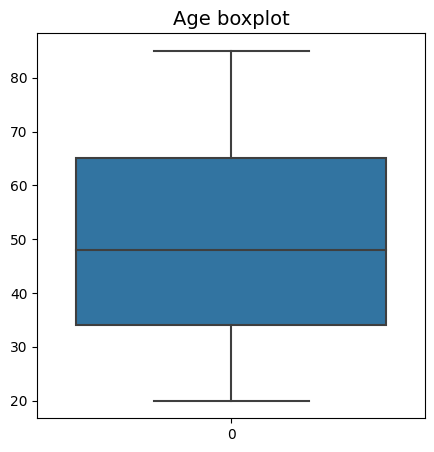

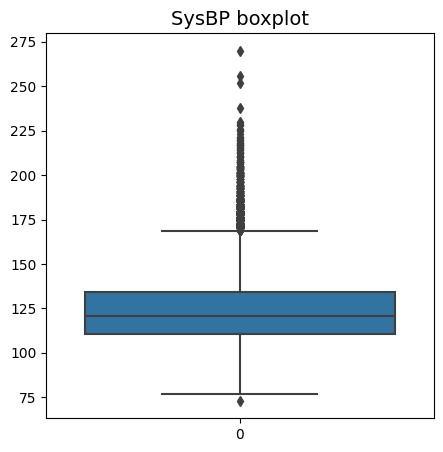

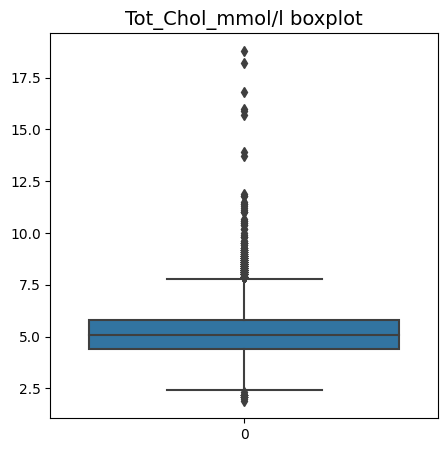

In [165]:
# Plotting the numerical variables in  the dataset
for feature in numeric_features:
    plt.figure(figsize=(5,5), facecolor='w')
    sns.boxplot(data=NHANES_df[feature])
    plt.title(f'{feature} boxplot', fontsize=14)
    plt.show()

In [166]:
# outliers detection

outliers_SysBP = (NHANES_df[(Framingham_df["SysBP"]>=280) | (NHANES_df["SysBP"] < 60)])
print(f'The total number of outliers in SysBP is: {len(outliers_SysBP)} ')

outliers_Tot_Chol = (NHANES_df[(NHANES_df["Tot_Chol_mmol/l"]>=14)])
print(f'The total number of outliers in Tot_Chol is: {len(outliers_Tot_Chol)} ')


The total number of outliers in SysBP is: 0 
The total number of outliers in Tot_Chol is: 6 


In [167]:
# outliers removal

NHANES_df = NHANES_df[(NHANES_df["Tot_Chol_mmol/l"] <14)]

NHANES_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23409 entries, 0 to 23414
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              23409 non-null  float64
 1   Gender           23409 non-null  int64  
 2   SysBP            23409 non-null  float64
 3   Diabetes         23409 non-null  int64  
 4   Smoking          23409 non-null  int64  
 5   Tot_Chol_mmol/l  23409 non-null  float64
 6   CVD risk         23409 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.4 MB


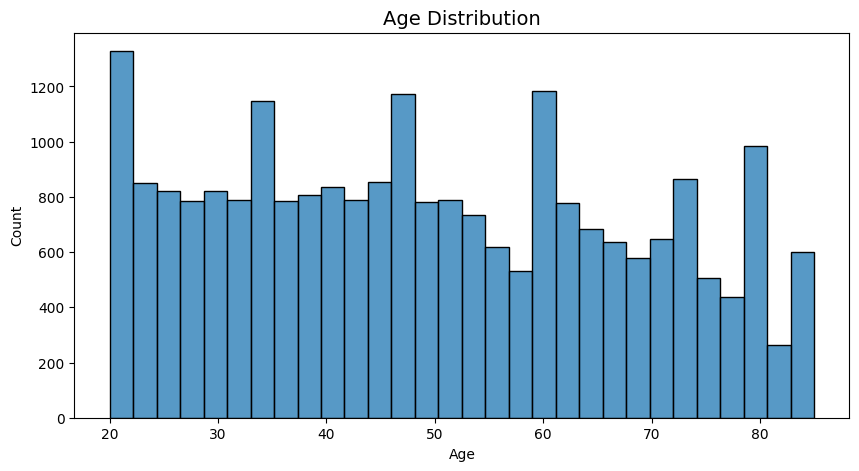

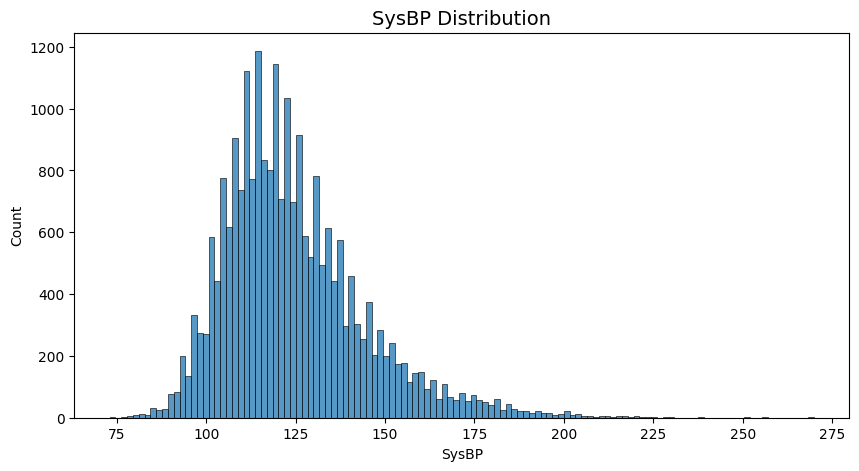

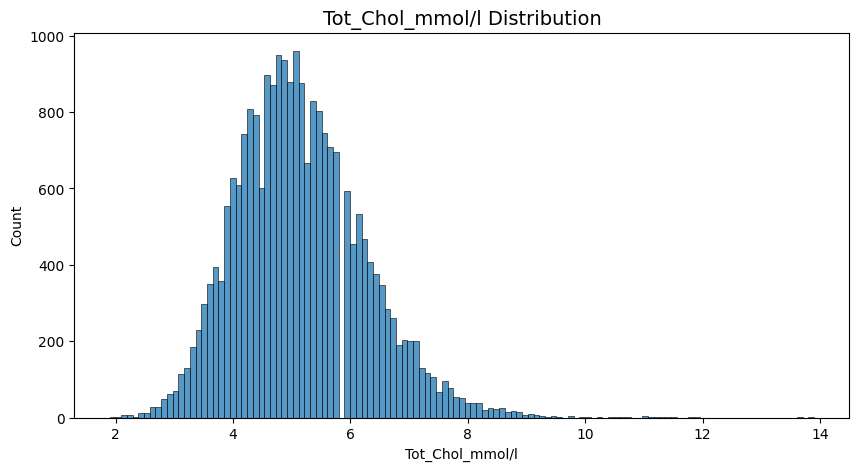

In [168]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(NHANES_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations
- Age distribution is almost even distribution.
- Systolic Blood pressure "SysBP' and Total cholesterol distribution are almost nornmal distribution.

In [169]:
# Checking the brief statistical properities of the categorical variables in the dataset

categorical_features = ['Gender', 'Diabetes', 'Smoking', 'CVD risk']
for feature in categorical_features:
    print(feature,':')
    print(NHANES_df[feature].value_counts())
    print("-----------------")

Gender :
1    12031
2    11378
Name: Gender, dtype: int64
-----------------
Diabetes :
0    20893
1     2516
Name: Diabetes, dtype: int64
-----------------
Smoking :
0    18241
1     5168
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    20765
1     2644
Name: CVD risk, dtype: int64
-----------------


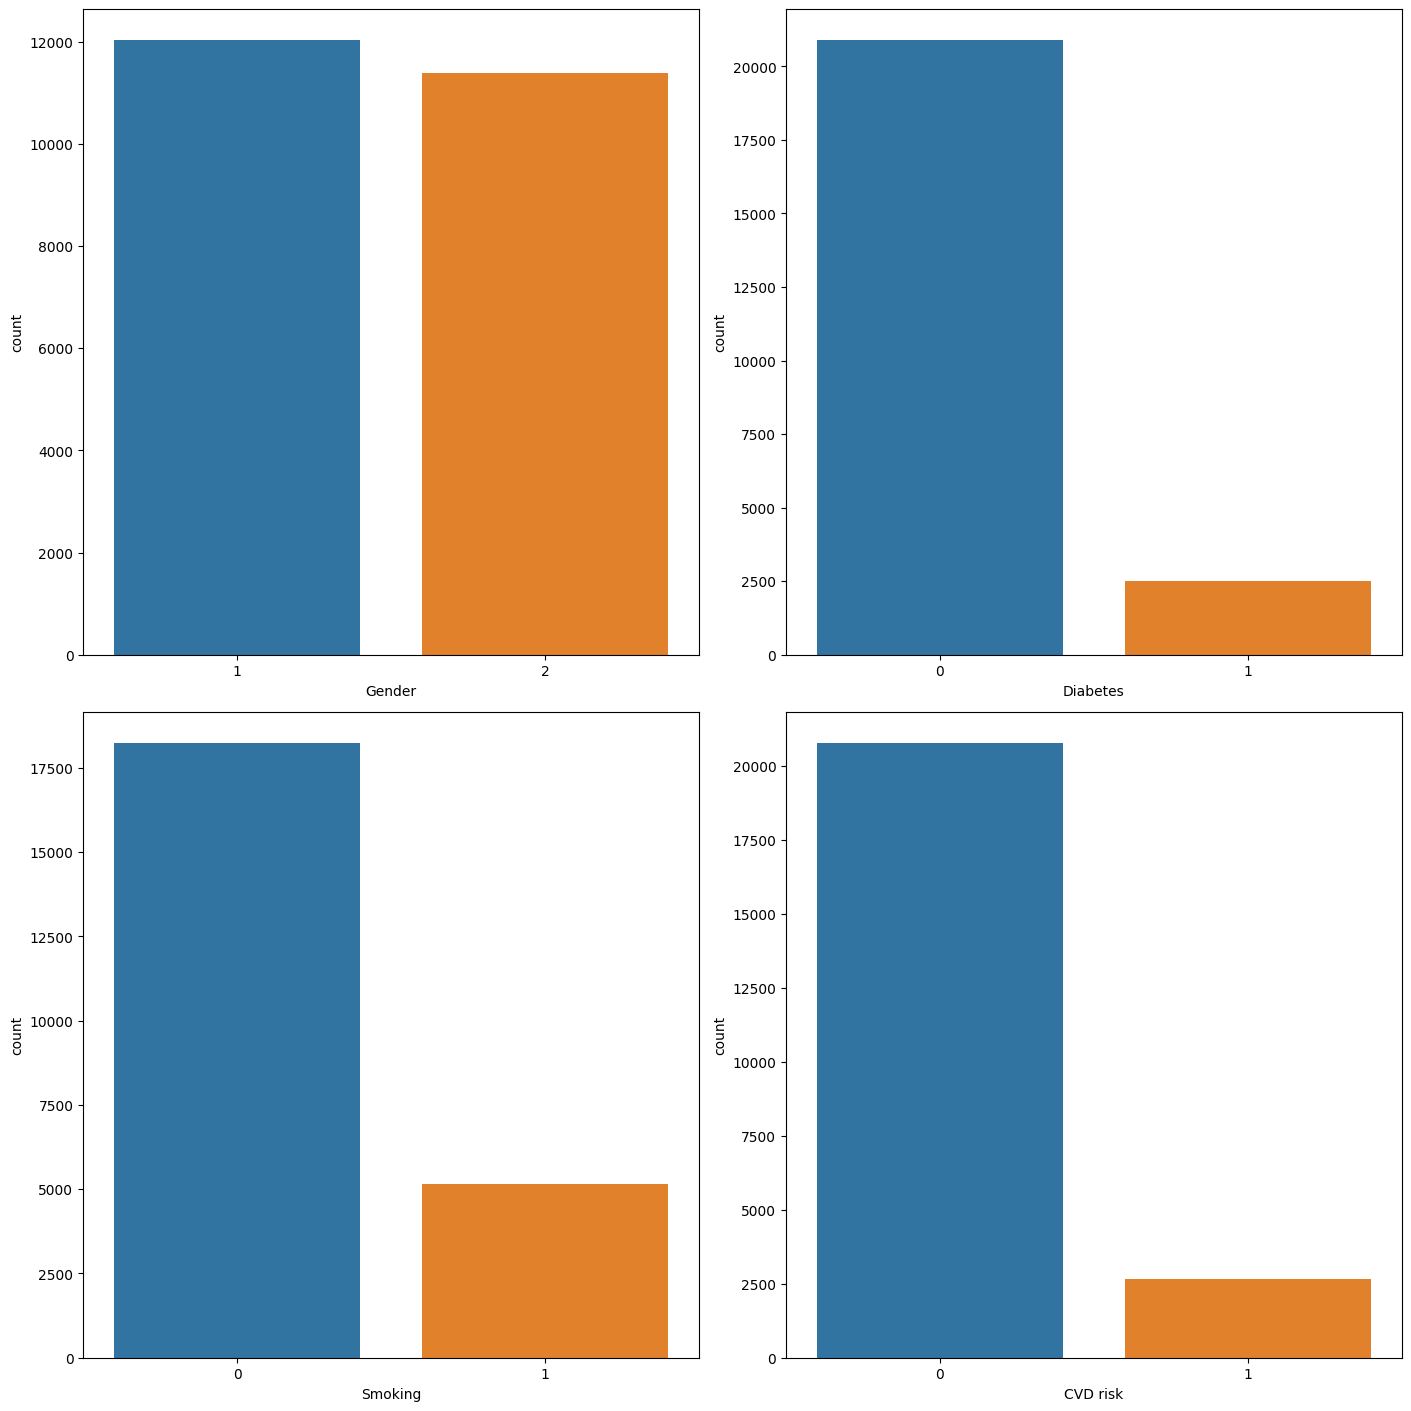

In [170]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=NHANES_df, ax=axs[row][pos])

Among the categorical features:
* `Diabetes` and `Smoking` are highly imbalanced.
* The target labl `CVD risk` is also showing high class imbalance.

## Combined Lab_based dataset 

In [171]:
# concatenation of dataframes

lab_df = pd.concat([Framingham_df, 
                    Canadian_df,
                    Bangladesh_df,
                   Osteoarthritis_center_df,
                   India_fibromyalgia_df,
                   Italy_df,
                   NHANES_df], axis=0, ignore_index=True)

lab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28965 entries, 0 to 28964
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              28965 non-null  float64
 1   Gender           28965 non-null  int64  
 2   SysBP            28965 non-null  float64
 3   Diabetes         28965 non-null  int64  
 4   Smoking          28965 non-null  int64  
 5   Tot_Chol_mmol/l  28965 non-null  float64
 6   CVD risk         28965 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.5 MB


In [172]:
# Checking Missing values in the dataset
num_Missing_values_lab = lab_df.isna().sum().sum()
print('Missing values: ', num_Missing_values_lab, '\n')

# Checking dupicated values in the dataset
duplicates_lab = lab_df.duplicated().sum()
if duplicates_lab:
    print('Duplicates Rows in Dataset are : {}'.format(duplicates_lab))
else:
    print('Dataset contains no Duplicate Values')

Missing values:  0 

Duplicates Rows in Dataset are : 523


In [173]:
lab_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,39.0,2,106.0,0,0,5.0,0
1,46.0,1,121.0,0,0,6.5,0
2,48.0,2,127.5,0,1,6.3,0
3,61.0,1,150.0,0,1,5.8,1
4,46.0,1,130.0,0,1,7.4,0


In [174]:
# Checking the brief statistical properities of the numerical variables in the dataset
lab_df[numeric_features].describe()

,Age,SysBP,Tot_Chol_mmol/l
count,28965.000000,28965.000000,28965.000000
mean,49.968455,125.989933,5.284764
std,17.259723,20.325563,1.147801
min,20.000000,73.000000,1.900000
25%,37.000000,112.000000,4.500000
50%,49.000000,122.500000,5.200000
75%,63.000000,136.700000,6.000000
max,85.000000,270.000000,13.900000


#### Observations

- Age has normal but narrow range between 20 to 85 years.
- Systolic blood pressure "SysBP" has normal range between 73 to 270 mmHg
- Total cholesterol has normal range between 1.9 to 13.9 mmol/L.

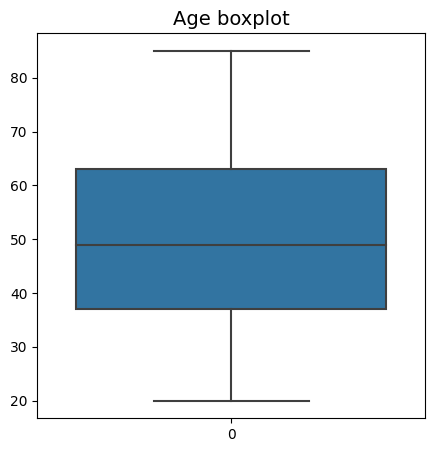

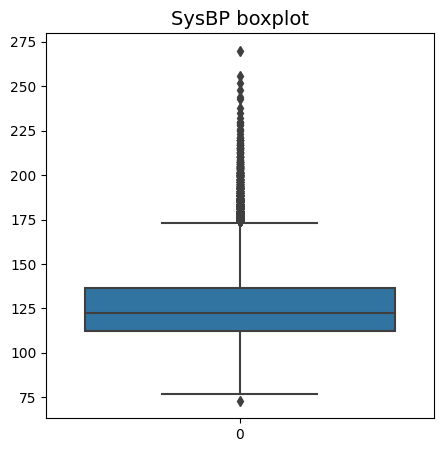

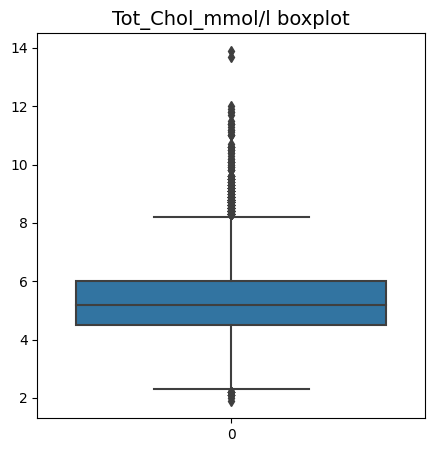

In [175]:
# Plotting the numerical variables in  the dataset
for feature in numeric_features:
    plt.figure(figsize=(5,5), facecolor='w')
    sns.boxplot(data=lab_df[feature])
    plt.title(f'{feature} boxplot', fontsize=14)
    plt.show()

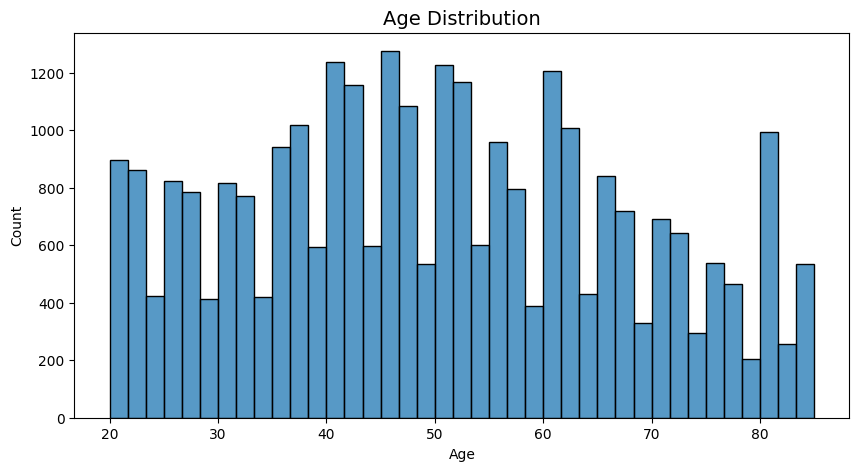

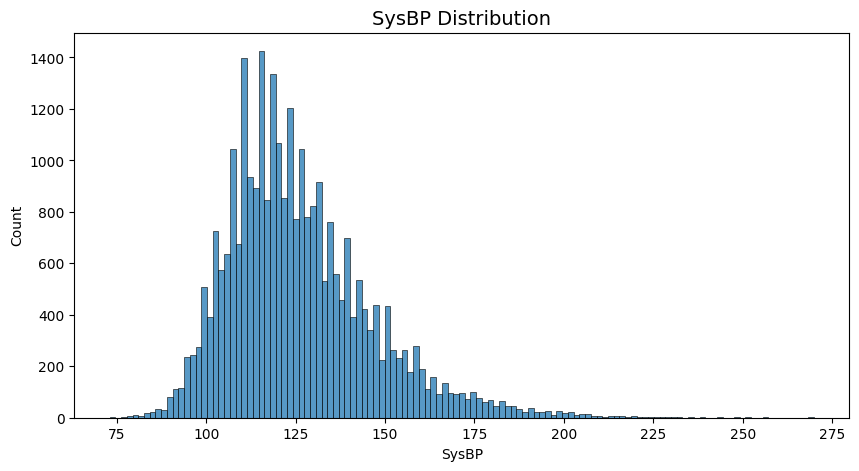

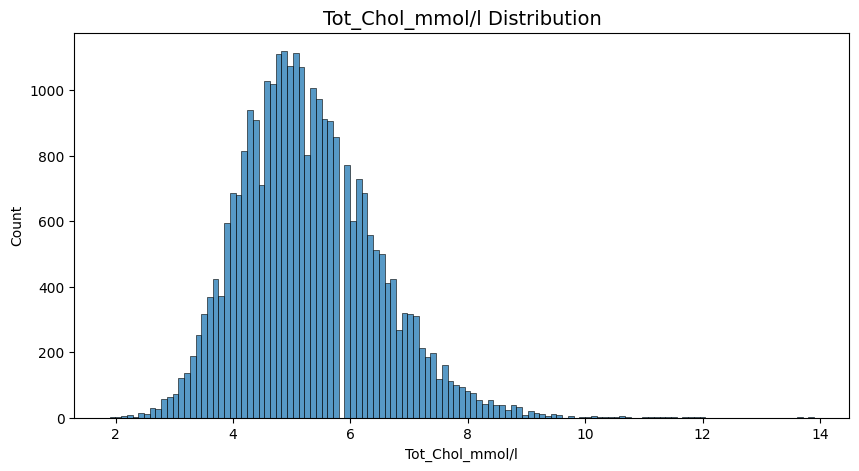

In [176]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(lab_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- Age distribution is almost even distribution.
- However, Systolic blood pressure "SysBP" distribution and total cholesterol distribution are almost normal with slight right skewness.

In [177]:
# Checking the brief statistical properities of the categorical variables in the dataset

for feature in categorical_features:
    print(feature,':')
    print(lab_df[feature].value_counts())
    print("-----------------")

Gender :
1    15136
2    13829
Name: Gender, dtype: int64
-----------------
Diabetes :
0    26113
1     2852
Name: Diabetes, dtype: int64
-----------------
Smoking :
0    21245
1     7720
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    25291
1     3674
Name: CVD risk, dtype: int64
-----------------


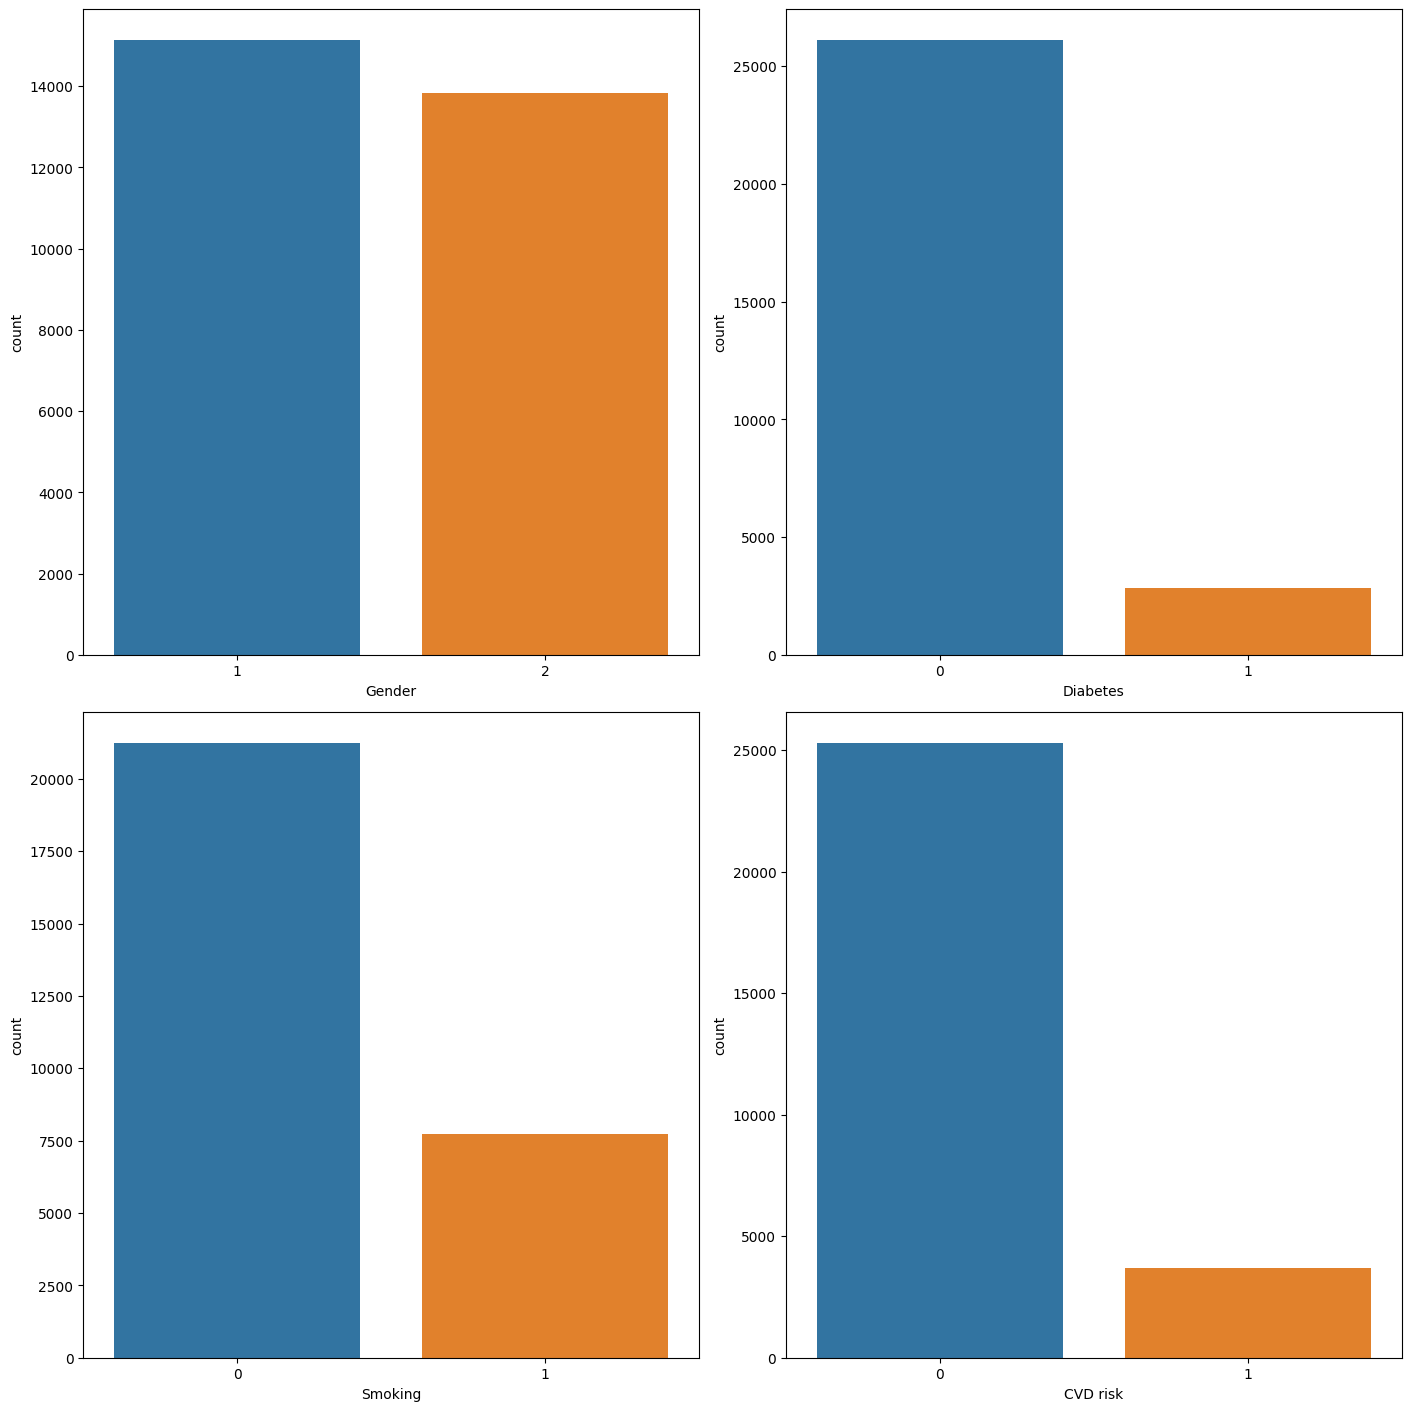

In [178]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=lab_df, ax=axs[row][pos])

In [179]:
lab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28965 entries, 0 to 28964
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              28965 non-null  float64
 1   Gender           28965 non-null  int64  
 2   SysBP            28965 non-null  float64
 3   Diabetes         28965 non-null  int64  
 4   Smoking          28965 non-null  int64  
 5   Tot_Chol_mmol/l  28965 non-null  float64
 6   CVD risk         28965 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.5 MB


In [183]:
lab_df.duplicated().sum()

523

In [180]:
# Dropping duplicates
lab_df_compact = lab_df.drop_duplicates()
lab_df_compact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28442 entries, 0 to 28964
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              28442 non-null  float64
 1   Gender           28442 non-null  int64  
 2   SysBP            28442 non-null  float64
 3   Diabetes         28442 non-null  int64  
 4   Smoking          28442 non-null  int64  
 5   Tot_Chol_mmol/l  28442 non-null  float64
 6   CVD risk         28442 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.7 MB


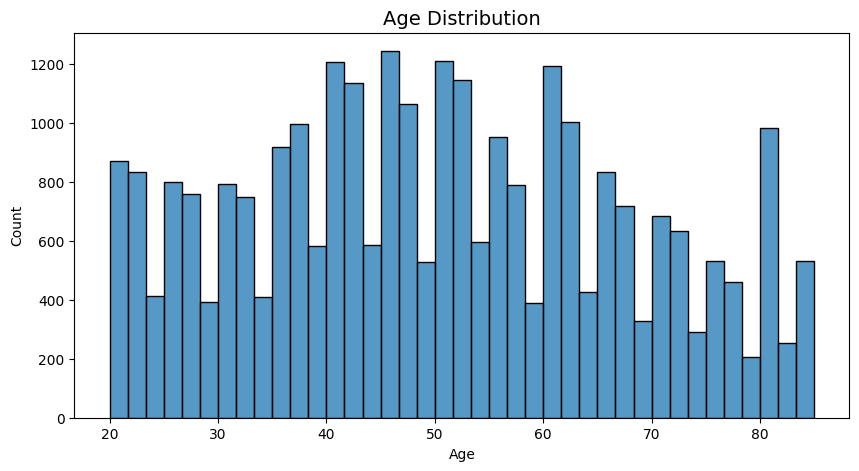

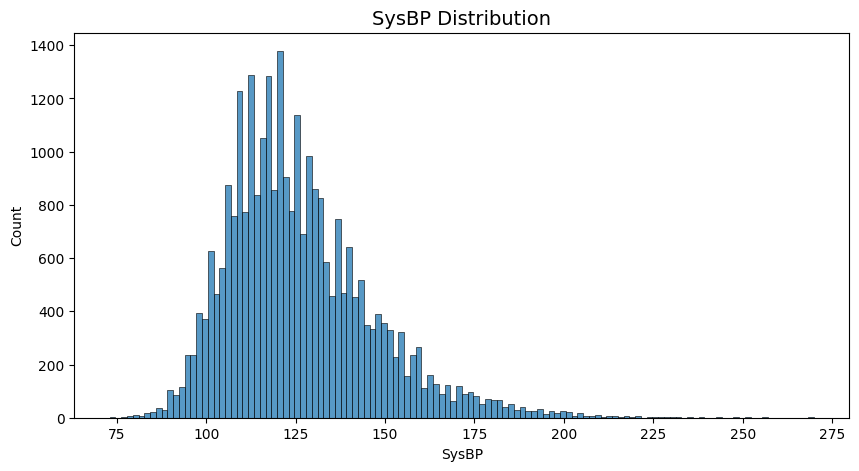

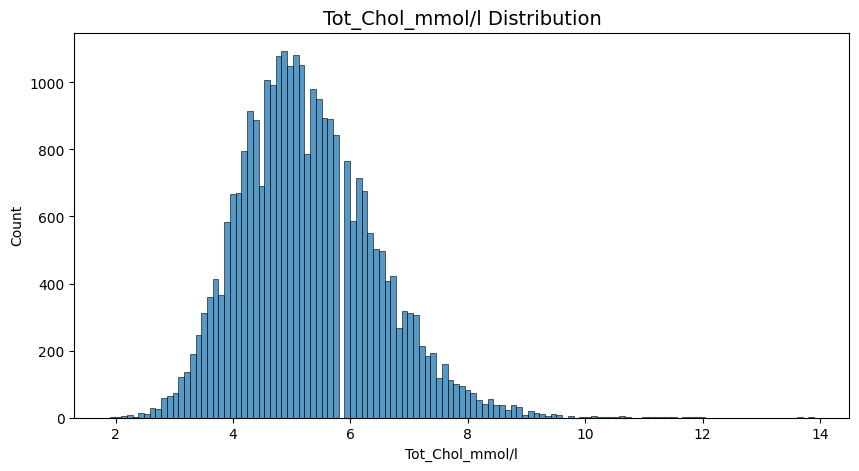

In [184]:
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(lab_df_compact[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

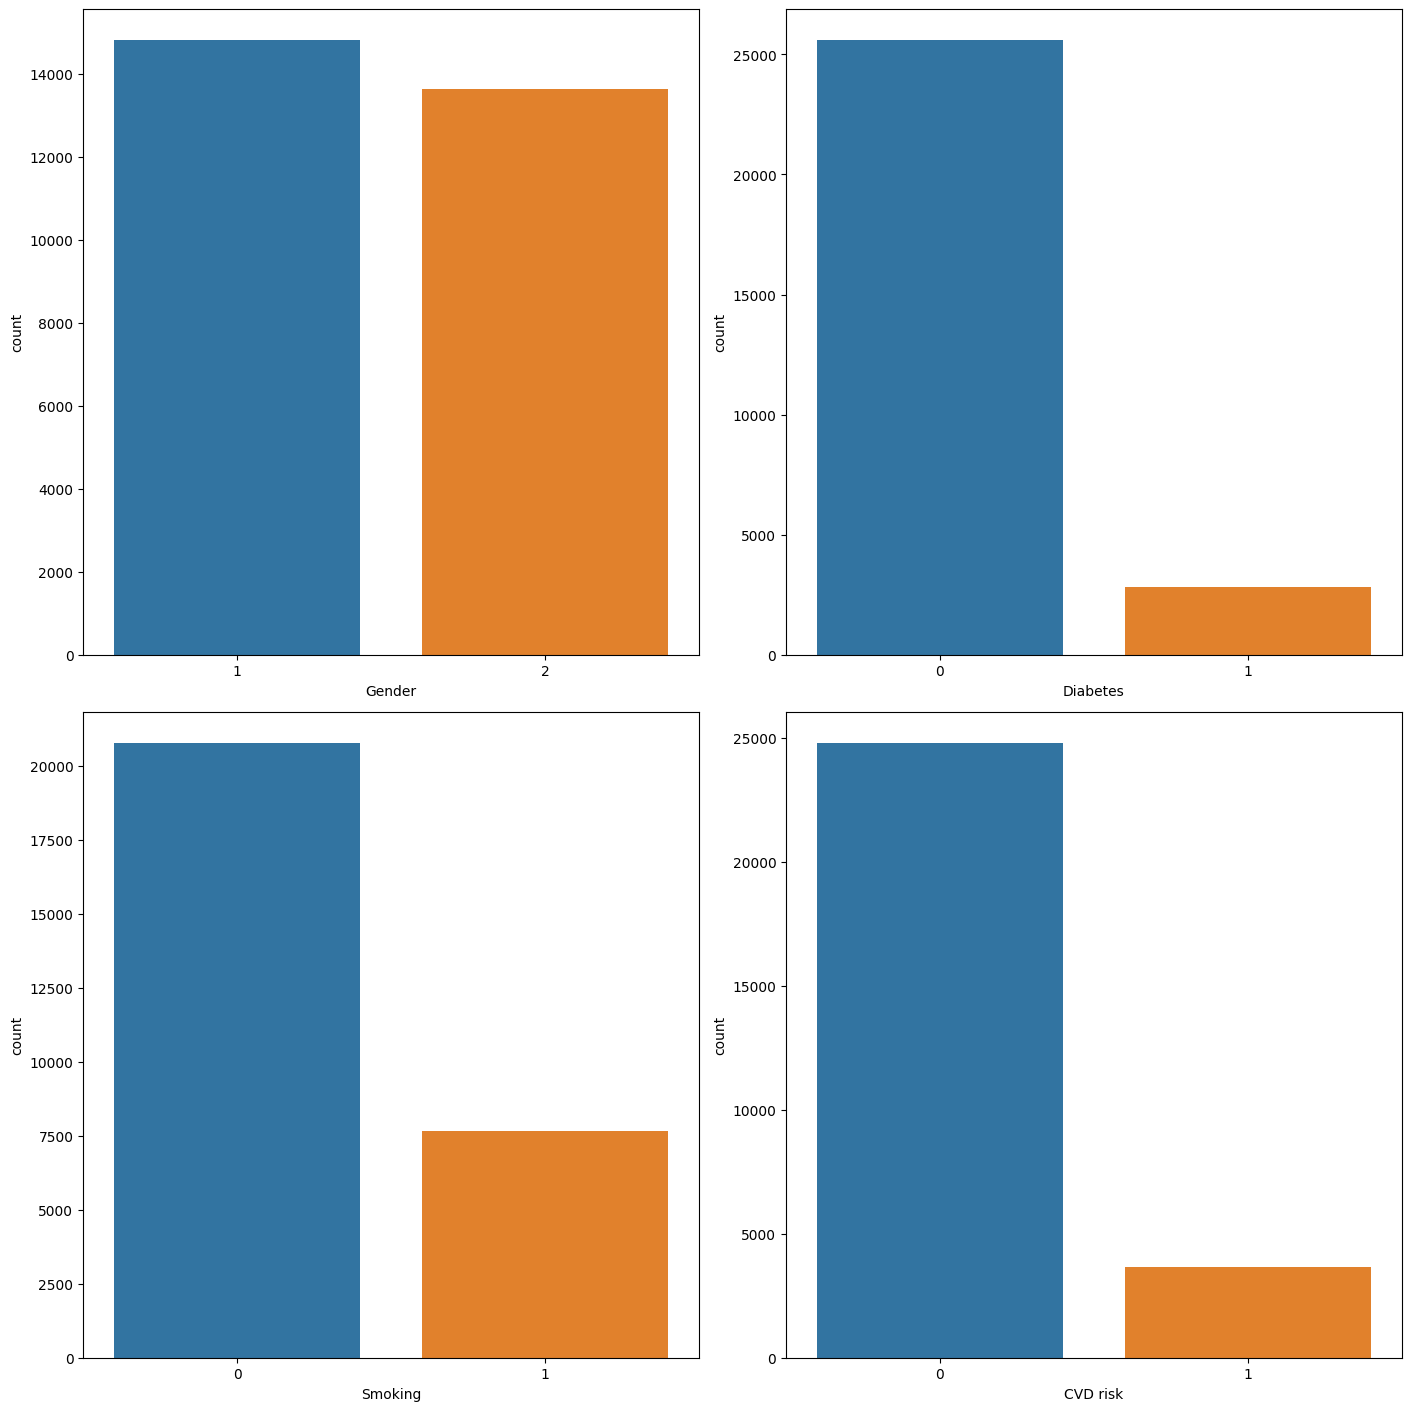

In [185]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=lab_df_compact, ax=axs[row][pos])

## Conclusion

**Removal of the duplicates from the dataset result in 28442 cases with normal distribution for the numerical variables and more balanced classes for the categorical varbiables, however, the target label `CVD risk` shows significant class imbalance.**

In [186]:
lab_df_compact.to_csv('lab_based_dataset.csv')

#### *Exploratory Data analysis will be applied in the next notebook*

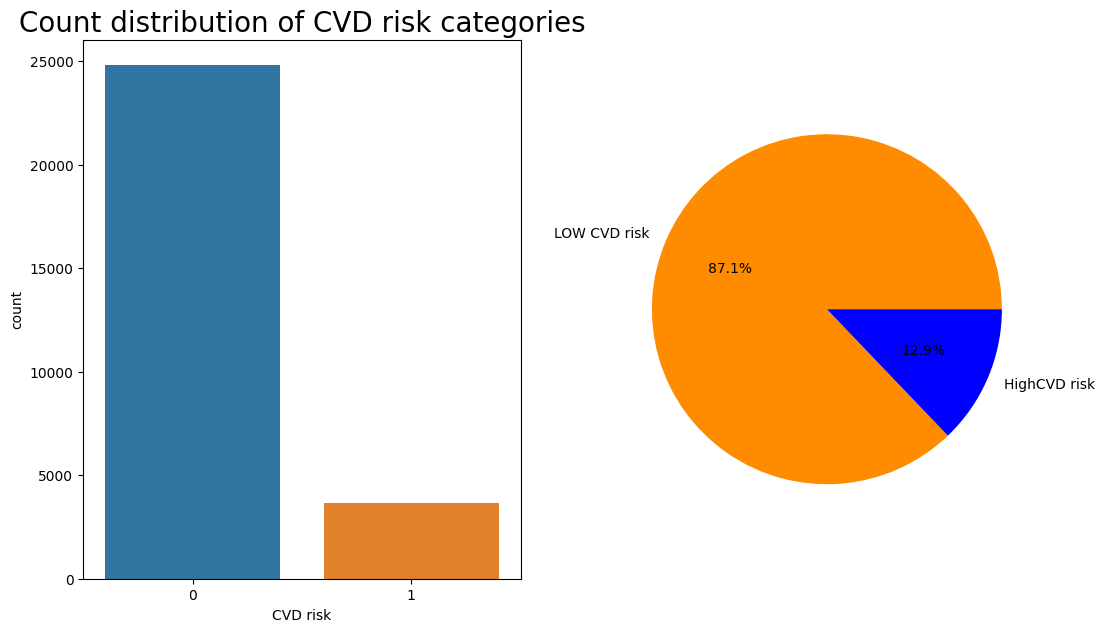

In [ ]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(7, 7), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="CVD risk", data=lab_df_compact)
plt.title("Count distribution of CVD risk categories", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(lab_df_compact["CVD risk"].value_counts(),autopct="%1.1f%%",labels=['LOW CVD risk', 'HighCVD risk'],colors=["darkorange","blue"])
plt.show()